# Assignment on Clustering and PCA
### `Selection of Countries using socio-economic and health factors`

## Index of Notebook
1. [Business Objective](#Business-Objective)
2. [Loading Dataset](#Loading-Dataset)
3. [Cleaning Dataset](#Cleaning-Dataset)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Data Preparation for PCA and Clustering](#Data-Preparation-for-PCA-and-Clustering) 
    * [Feature Standardization or Normalization](#Feature-Standardization-or-Normalization)


6. [Selection of Principal Components using PCA](#Selection-of-Principal-Components-using-PCA)
7. [Outlier Analysis and Treatment](#Outlier-Analysis-and-Treatment)
8. [Visualizing Principal components](#Visualizing-Principal-components)
9. [Pre K-Means Clustering Analysis](#Pre-K-Means-Clustering-Analysis)
    * [Hopkins Analysis](#Hopkins-Analysis)
    * [Silhouette and Elbow Analysis](#Silhouette-and-Elbow-Analysis)


10. [K Means with K as 5](#K-Means-with-K-as-5)
11. [K Means with K as 6](#K-Means-with-K-as-6)
12. [K Means with K as 7](#K-Means-with-K-as-7)
13. [Hierarchical Clustering Single Method](#Hierarchical-Clustering-Single-Method)
14. [Hierarchical Clustering Complete Method](#Hierarchical-Clustering-Complete-Method)
15. [Combined list of countries from K-Means and Hierarchical Clustering](#Combined-list-of-countries-from-K-Means-and-Hierarchical-Clustering)
16. [Analysis of Outlier that were dropped](#Analysis-of-Outlier-that-were-dropped)
17. [Combining, Visualizing and Summarizing Results](#Combining,-Visualizing-and-Summarizing-Results)

----

## Business Objective

We need to help the CEO of HELP International, an international humanitarian NGO, in the process of selection of countries they should focus on. The selection will be based on some socio-economic and health factors that determine the overall development of the country.

In other words, it is required to cluster the countries by the factors mentioned above and then present our solution and recommendations to the CEO. We are also supposed to use dimensionality reduction using PCA to get the visualizations of the clusters in a 2-D form.

----

## Loading Dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# To perform KMeans clustering 
from sklearn.cluster import KMeans
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} |Matplotlib version: {mpl.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.15.4 | Pandas version: 0.23.4 |Matplotlib version: 3.0.2 | Seaborn version: 0.9.0'

In [2]:
# Importing the data for analysis locally
df_dict = pd.read_csv('data-dictionary.csv')
df_data = pd.read_csv('Country-data.csv')

In [3]:
# Changing default display options for better visibility of data
%matplotlib inline
pd.set_option("display.max_colwidth",255)

In [4]:
# Displaying data from 'data-dictionary.csv' to be used for reference later
df_dict

Column Name  \
0     country   
1  child_mort   
2     exports   
3      health   
4     imports   
5      Income   
6   Inflation   
7  life_expec   
8   total_fer   
9        gdpp   

                                                                                                        Description  
0                                                                                               Name of the country  
1                                                       Death of children under 5 years of age per 1000 live births  
2                                                     Exports of goods and services. Given as %age of the Total GDP  
3                                                                        Total health spending as %age of Total GDP  
4                                                     Imports of goods and services. Given as %age of the Total GDP  
5                                                                                             Net income per person  
6                                                        The measurement of the annual growth rate of the Total GDP  
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8       The number of children that would be born to each woman if the current age-fertility rates remain the same.  
9                                  The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
# Displaying some data from 'Country-data.csv'
df_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [6]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(167, 10)

Count of dataframe:
country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

Columns in dataframe:
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Description of dataframe:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.75

**Summary**:
1. There are 167 rows and 10 columns in dataframe
2. These 10 columns comprises of measures (numeric value) except the contry name, which anyways is going to be the output column
3. The dataset is clean, i.e. no missing/null values

----

## Cleaning Dataset

In [7]:
# Dropping duplicate values in dataset, if exist
df_data = df_data.drop_duplicates()
print(f'\nShape of dataframe:\n{df_data.shape}')


Shape of dataframe:
(167, 10)


In [8]:
# Getting deatils for df_data dataset
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nDatatypes of dataframe:\n{df_data.dtypes}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(167, 10)

Count of dataframe:
country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

Datatypes of dataframe:
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Columns in dataframe:
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Description of dataframe:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min   

In [9]:
# Separating numerical and categorical fields for analysisng them separately.

# OUTCOME COLUMN: 'country'

# NUMERICAL COLUMNS: 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'
num_col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# CATEGORICAL COLMNS: None

**Note**: We no not have any categorical variable, thus we will skip dummification of categorical variables.

----

## Exploratory Data Analysis

In [10]:
# Function for Analysis of Numerical columns independently (Boxplot)
def univariate_analysis(i,col_i):
    plt.figure(i, figsize=(5, 5))
    sns.set(style="whitegrid",font_scale=.75)
    ax = sns.boxplot(y=col_i, data=df_data[[col_i]])
    ax = sns.swarmplot(y=col_i, data=df_data[[col_i]], color=".25")
    ax.set(ylabel="", xlabel=f"Distribution of {col_i}")
           
# Function for Analysis of Numerical column w.r.t. Country (Barplot)
def bivariate_analysis(i,col_i,col_o):
    plt.figure(i, figsize=(10, 30))
    sns.set(style="whitegrid",font_scale=.75)
    ax = sns.barplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]], color="b")
    ax.set(ylabel="", xlabel=f"{col_i} [ {df_dict[df_dict['Column Name'].str.upper()==col_i.upper()]['Description'].to_string()[5:]} ] in each {col_o}")

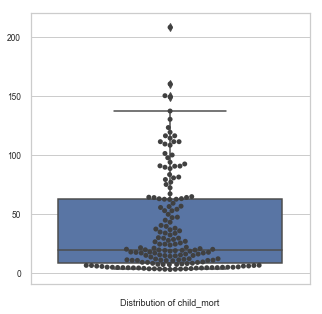

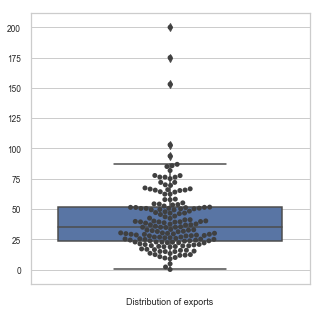

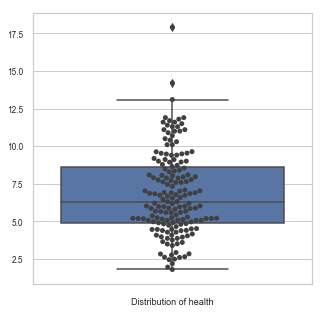

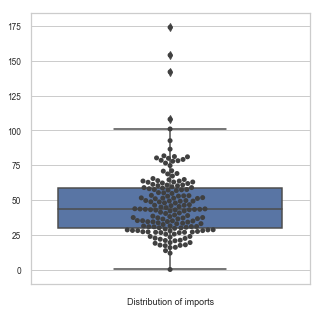

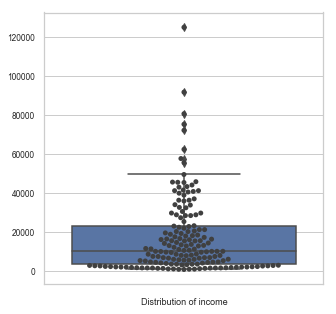

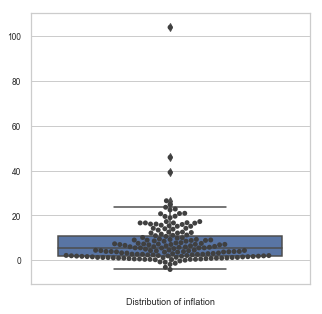

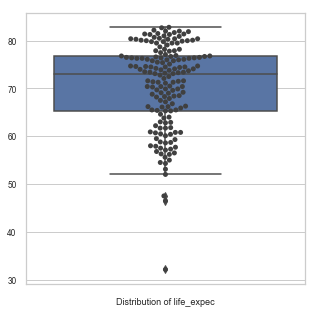

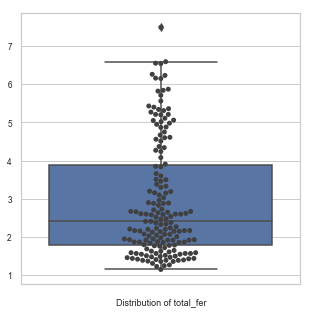

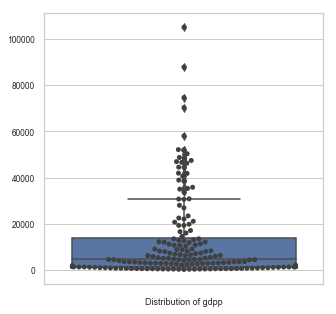

In [11]:
# NUMERICAL COLUMN ANALYSIS (Barplot)
for i, col in enumerate(num_col):
    univariate_analysis(i, col)

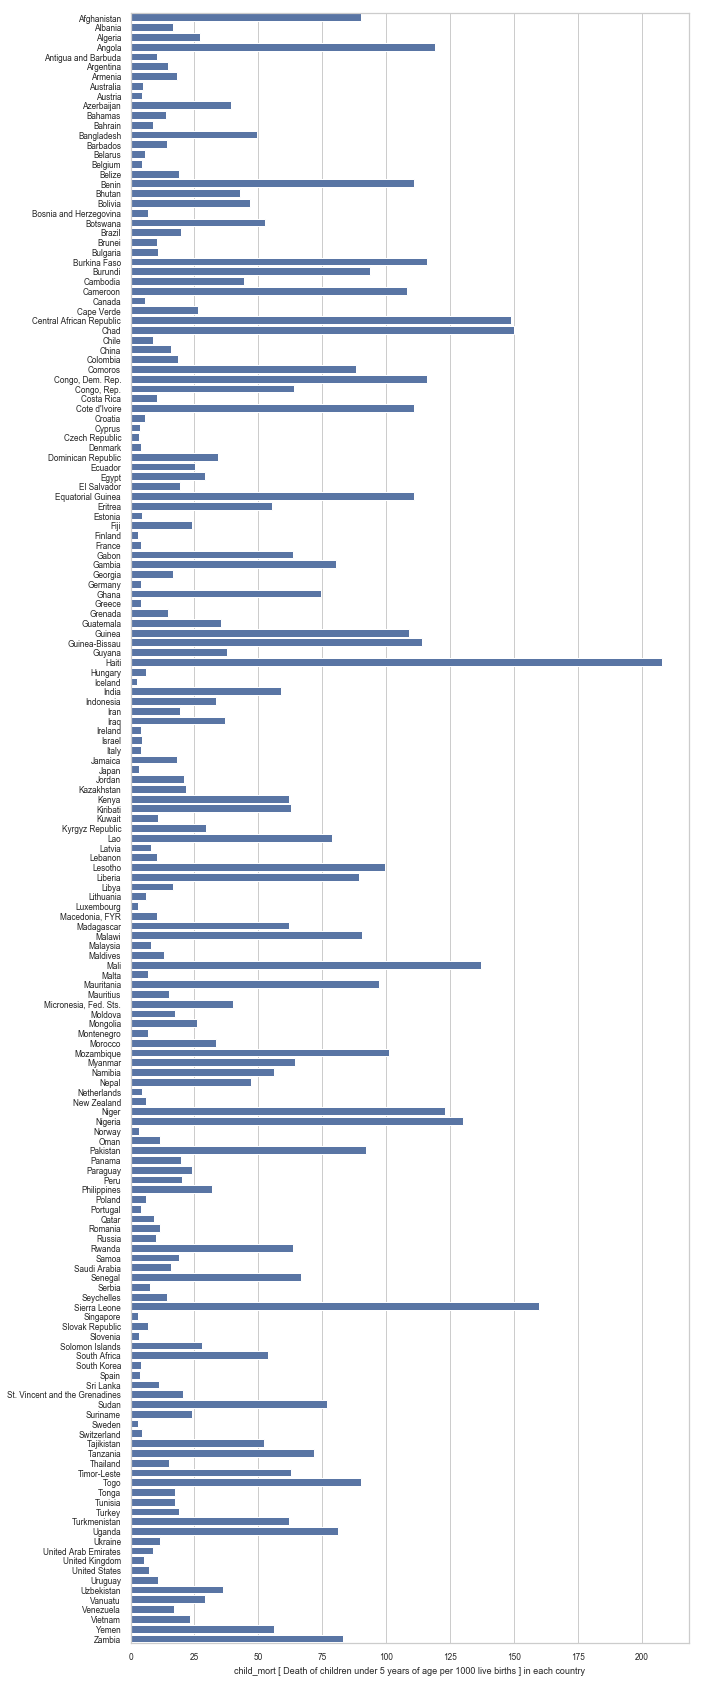

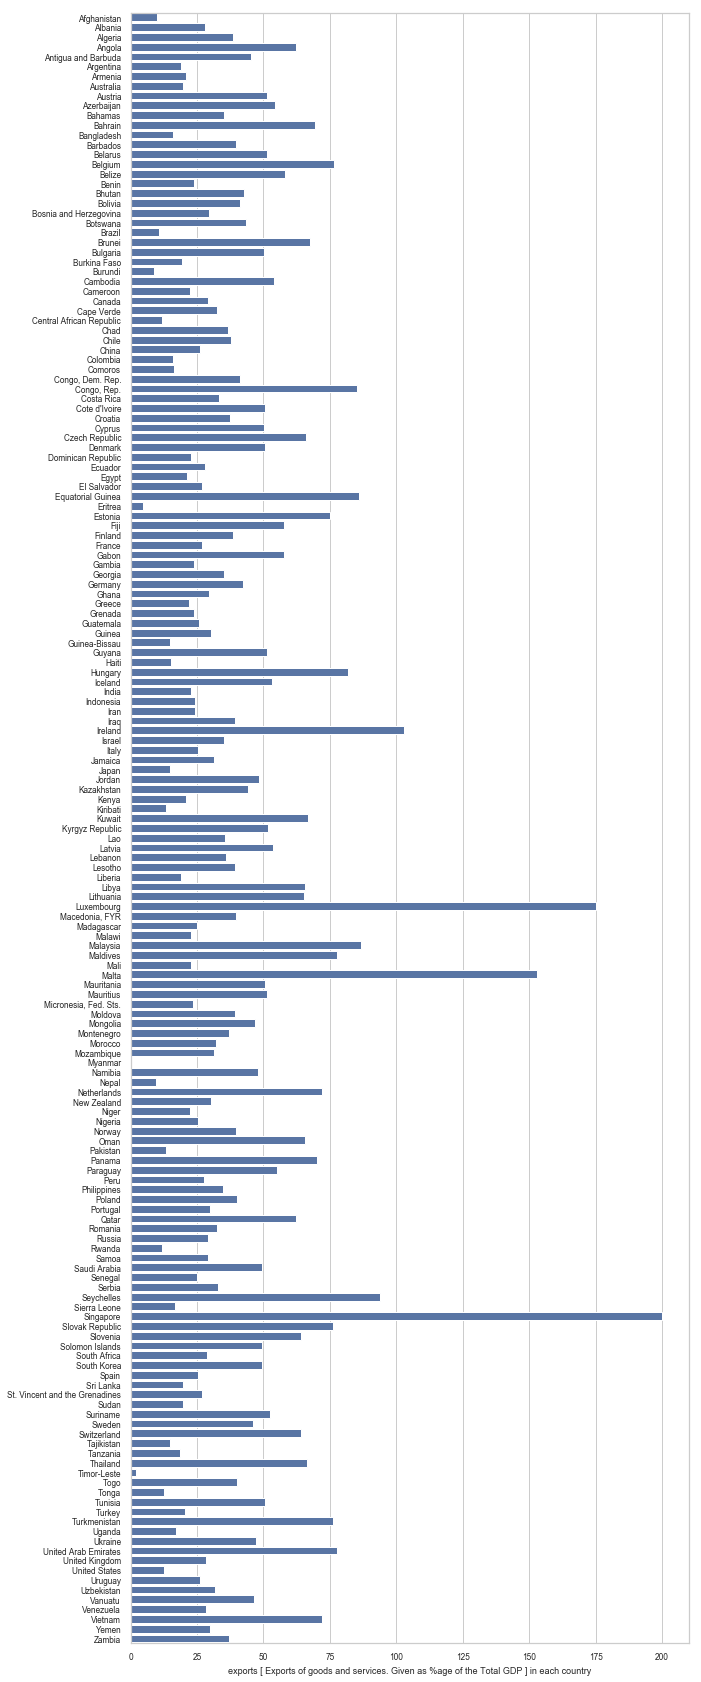

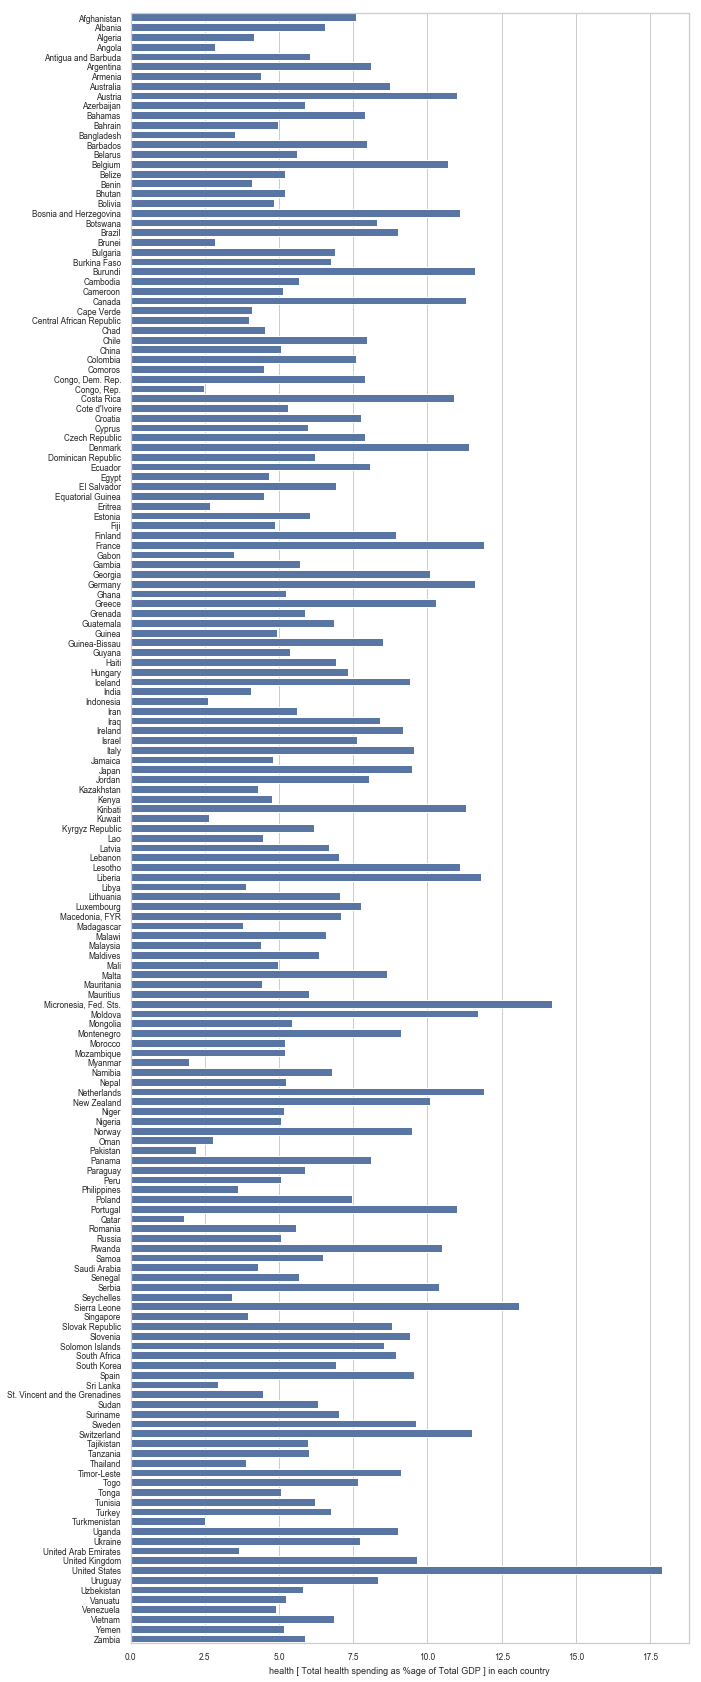

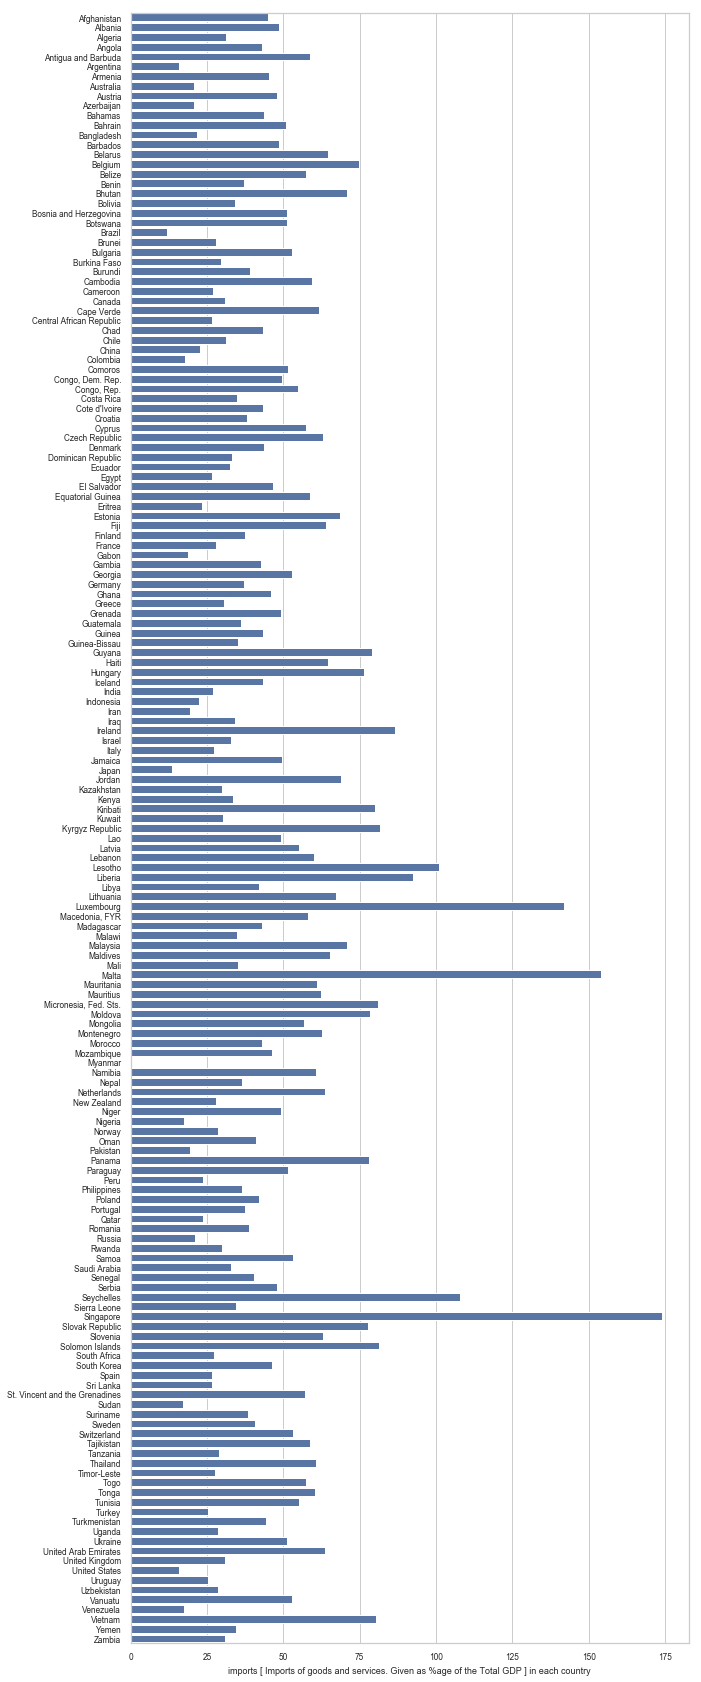

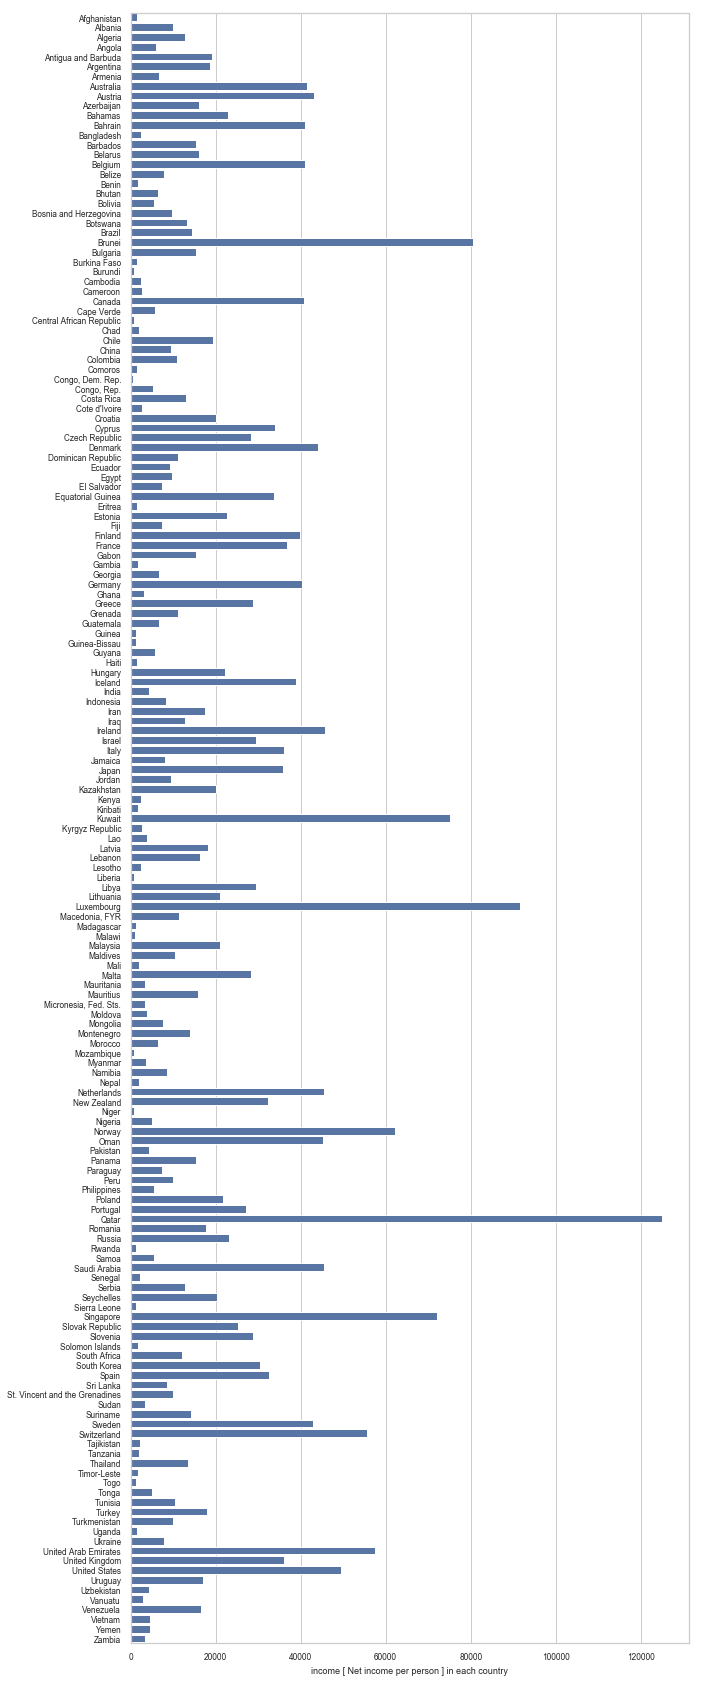

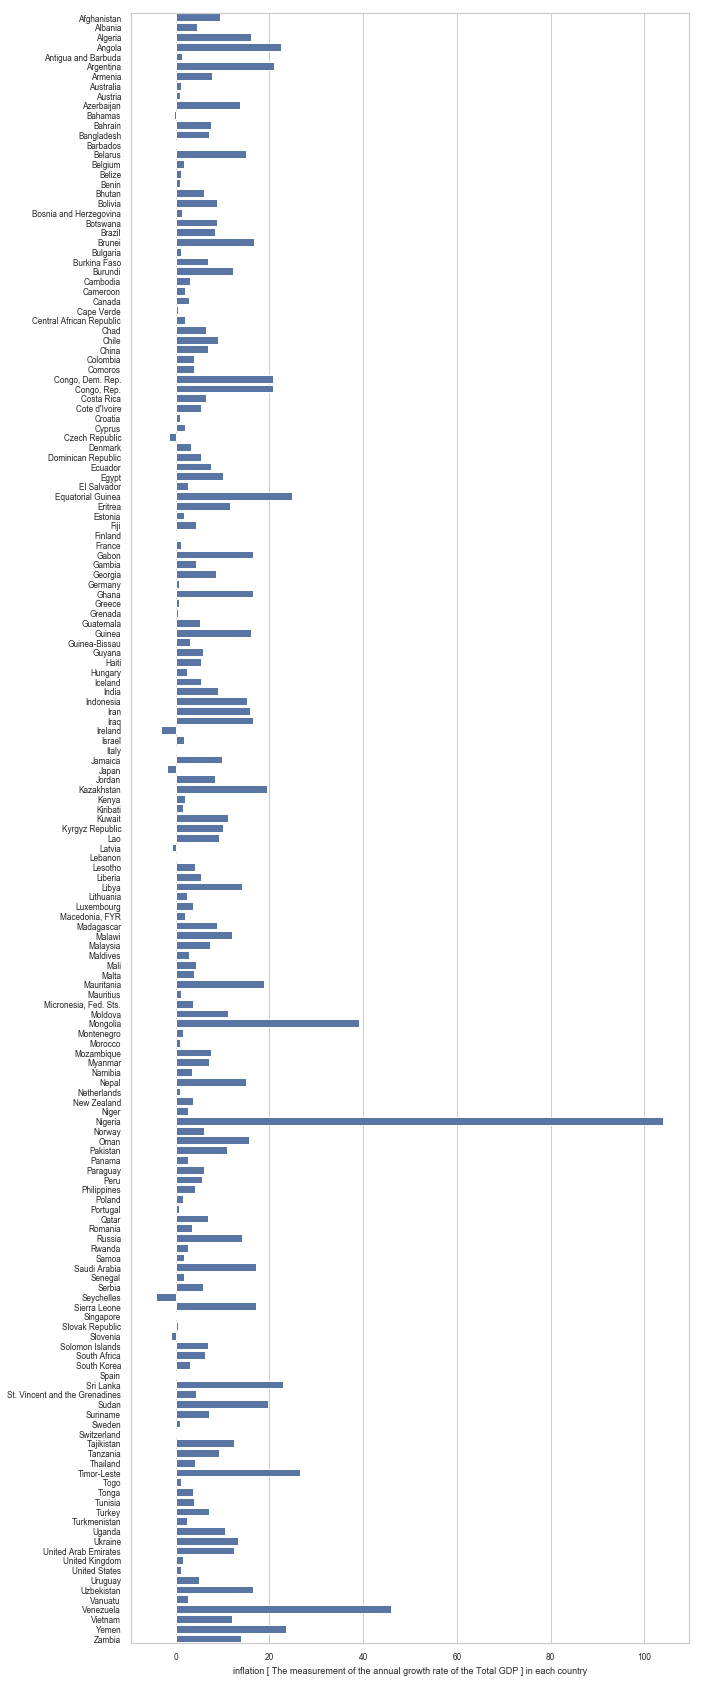

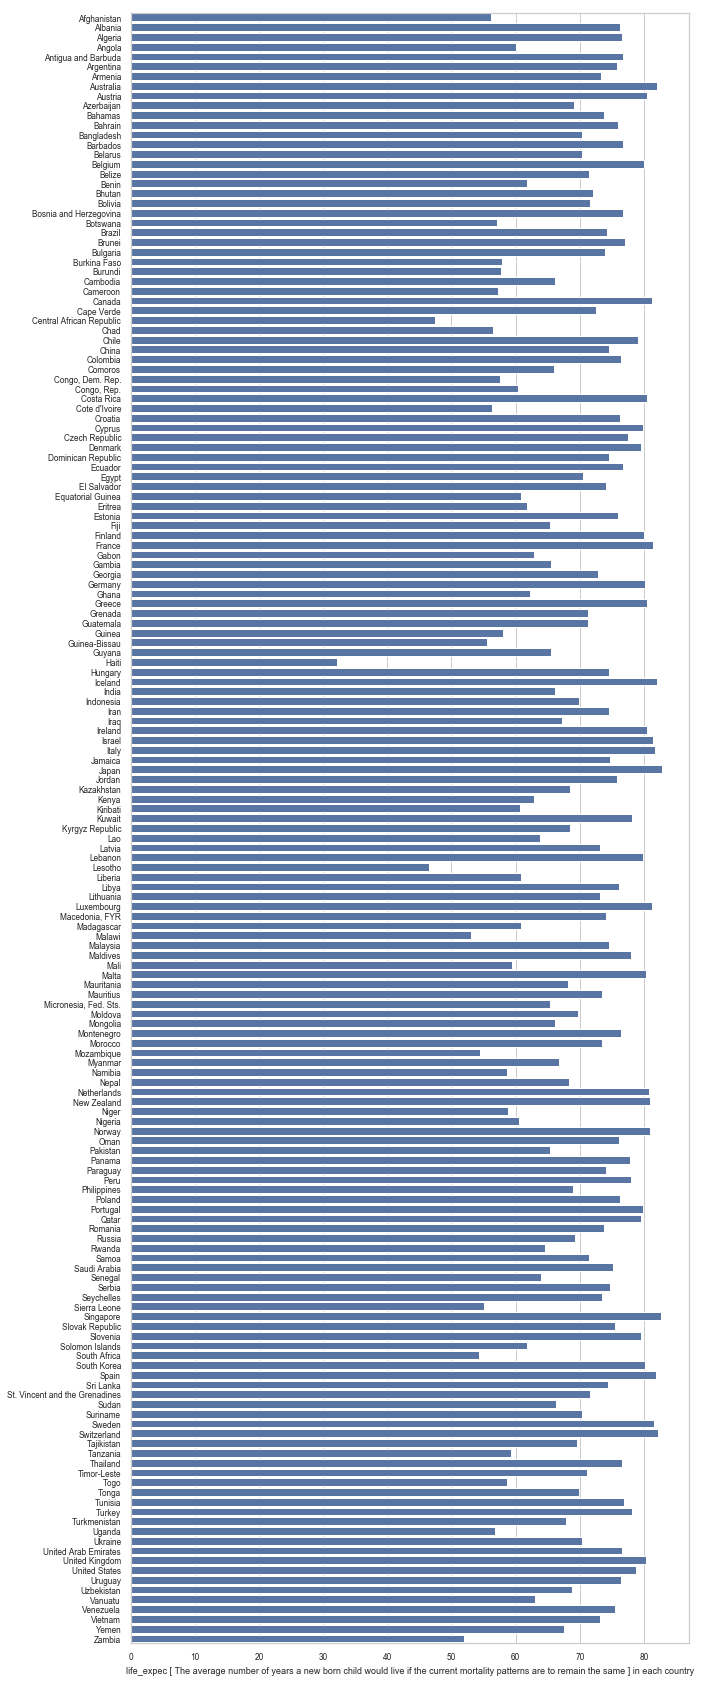

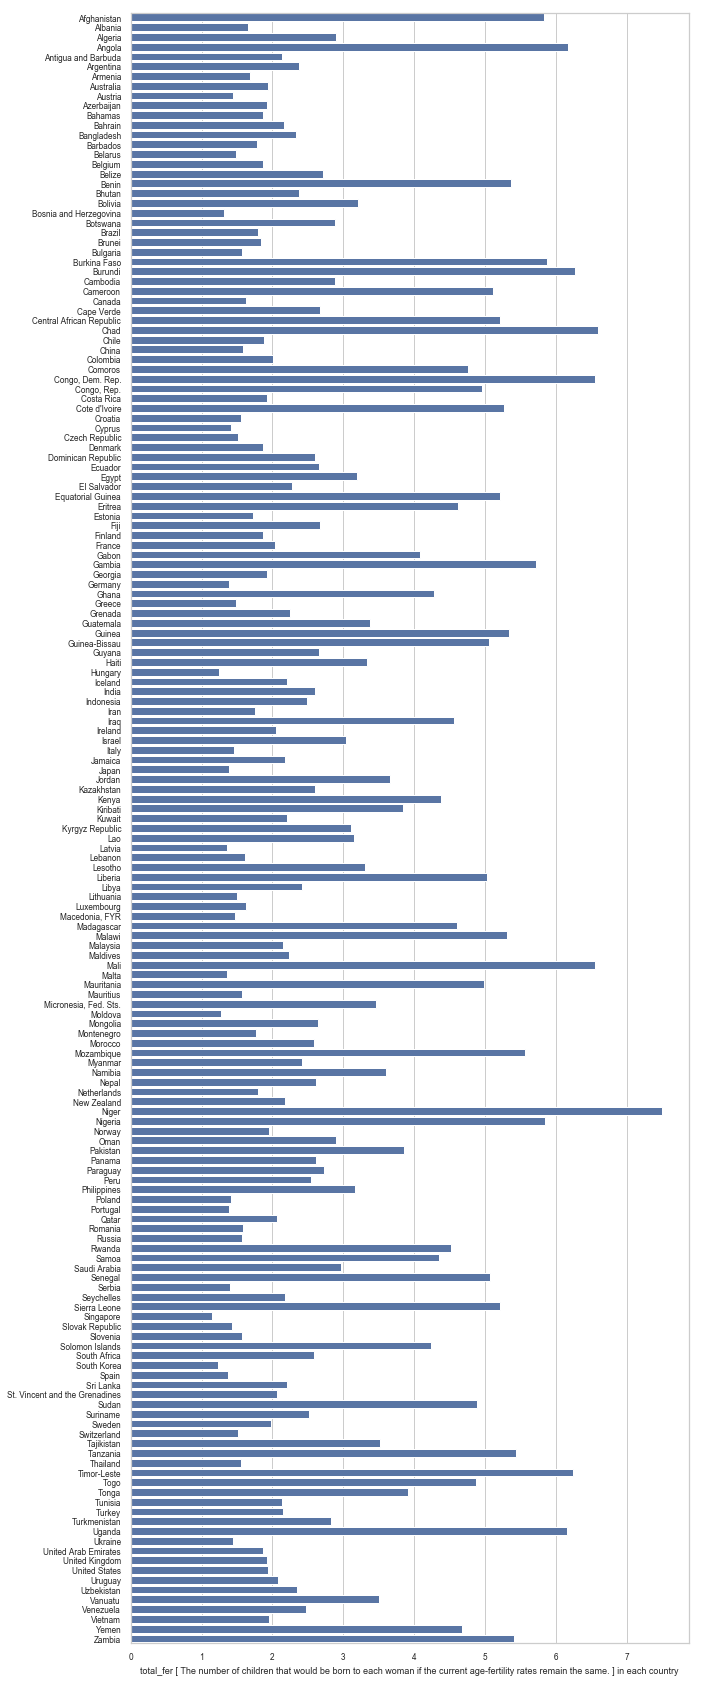

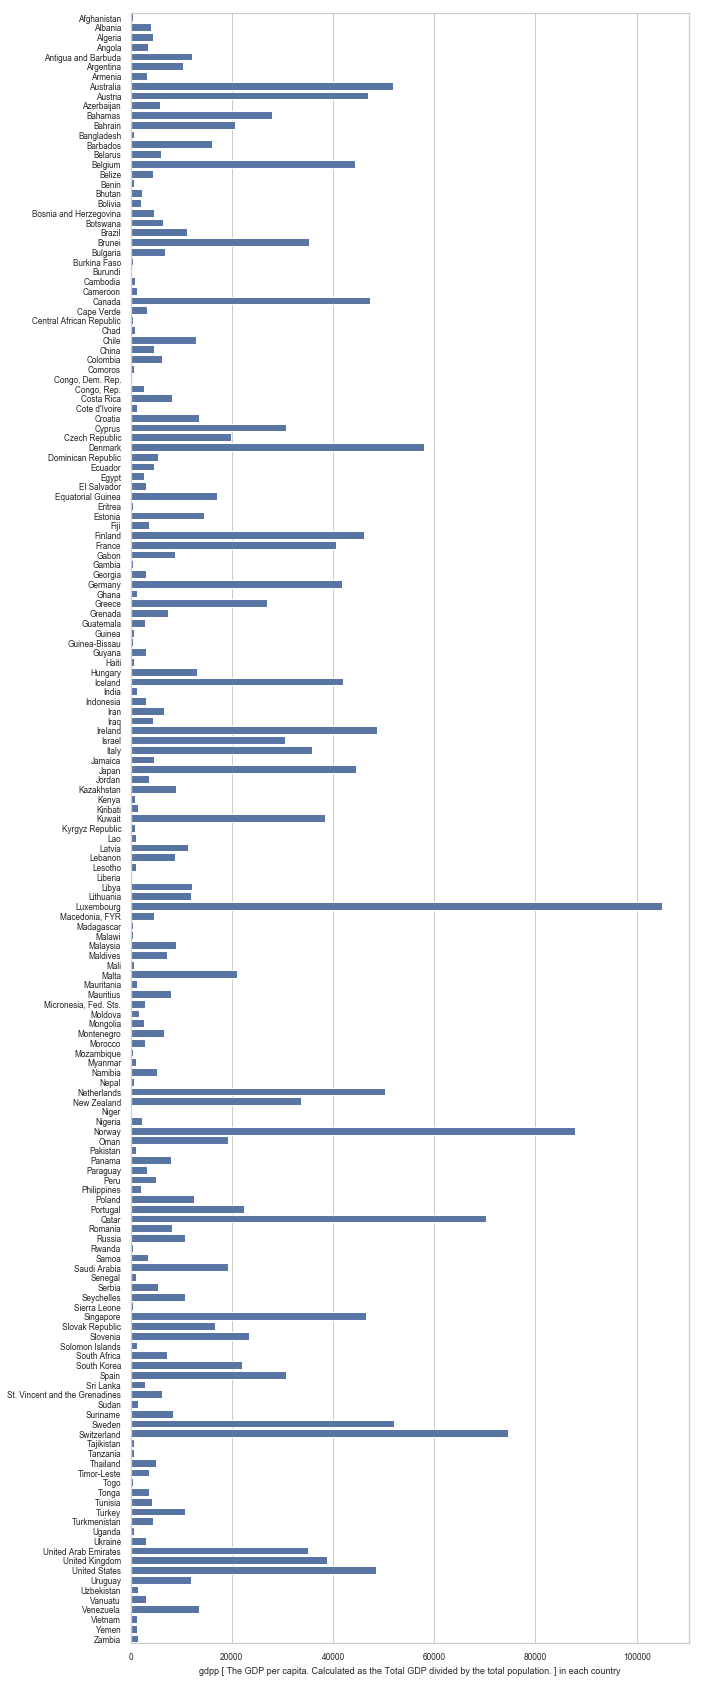

In [12]:
# NUMERICAL COLUMN ANALYSIS (Barplot)
for i, col in enumerate(num_col):
    bivariate_analysis(i, col, 'country')

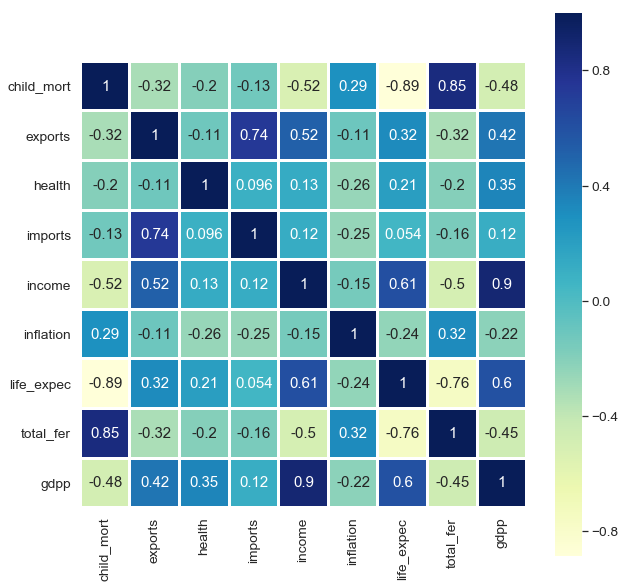

In [13]:
# NUMERICAL COLUMN HEATMAP (Co-relation Analysis)
plt.figure(i, figsize=(10, 10))
sns.set(style="whitegrid",font_scale=1.25)
sns.heatmap(df_data[num_col].corr(), annot=True, linewidths=2, square=True, cmap="YlGnBu")

**Note**: Our initial columns are highly co-related and hence, not good to be used directly for model building. 
We will use PCA to find good set of Principal Components which are not co-related.

----

## Data Preparation for PCA and Clustering

In [14]:
# Helpful in labelling and identifying countries properly
df_data.set_index('country', inplace =True)

#### Feature Standardization or Normalization

In [15]:
# Normalising continuous features
df = df_data[num_col]
df_data_norm = (df-df.mean())/df.std()
df_data_norm.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.287660 -1.134867  0.278251 -0.082208 -0.805822   
Albania               -0.537333 -0.478220 -0.096725  0.070624 -0.374243   
Algeria               -0.272015 -0.098824 -0.963176 -0.639838 -0.220182   
Angola                 2.001787  0.773056 -1.443729 -0.164820 -0.583289   
Antigua and Barbuda   -0.693548  0.160186 -0.286034  0.496076  0.101427   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.156864   -1.614237   1.897176 -0.677143  
Albania              -0.311411    0.645924  -0.857394 -0.484167  
Algeria               0.786908    0.668413  -0.038289 -0.463980  
Angola                1.382894   -1.175698   2.121770 -0.514720  
Antigua and Barbuda  -0.599944    0.702147  -0.540321 -0.041692

----

## Selection of Principal Components using PCA

In [16]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [17]:
#Doing the PCA on the train data
pca.fit(df_data_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

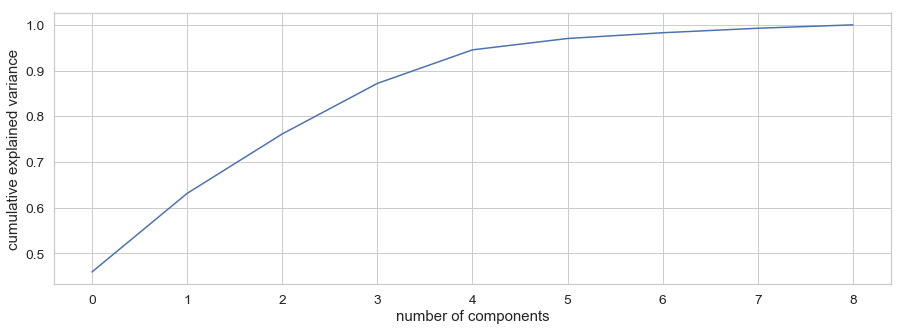

In [18]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Note**: Selecting 4 as number of Principal components since it explains ~ 95% variance.

In [19]:
# Not using Incremental PCA since our dataset is not too large and could be easily handled by PCA.
# As per official documentation,
# Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory.
# IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples.
pca_final = PCA(n_components=4,random_state=100)

#### Basis transformation - getting the data onto our PCs

In [20]:
df_data_norm_pca = pd.DataFrame(pca_final.fit_transform(df_data_norm))
df_data_norm_pca.index = df_data_norm.index
df_data_norm_pca.columns = ['PC1','PC2','PC3','PC4']
df_data_norm_pca.shape

(167, 4)

In [21]:
# Trying to understand the relationship between the PCs and Original columns
colnames = list(df_data_norm.columns)
pcs_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],'PC3':pca_final.components_[2],'PC4':pca_final.components_[3], 'Feature':colnames})
pcs_df

PC1       PC2       PC3       PC4     Feature
0 -0.419519  0.192884 -0.029544  0.370653  child_mort
1  0.283897  0.613163  0.144761  0.003091     exports
2  0.150838 -0.243087 -0.596632  0.461897      health
3  0.161482  0.671821 -0.299927 -0.071907     imports
4  0.398441  0.022536  0.301548  0.392159      income
5 -0.193173 -0.008404  0.642520  0.150442   inflation
6  0.425839 -0.222707  0.113919 -0.203797  life_expec
7 -0.403729  0.155233  0.019549  0.378304   total_fer
8  0.392645 -0.046022  0.122977  0.531995        gdpp

#### Creating correlation matrix for the principal components - we expect little to no correlation

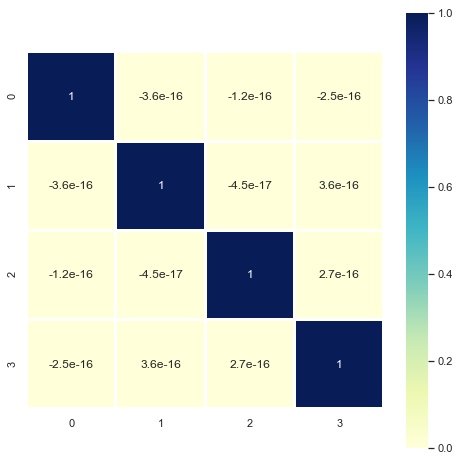

In [22]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_data_norm_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (8,8))
sns.set(style="whitegrid",font_scale=1)
sns.heatmap(corrmat, annot = True, linewidths=2, square=True, cmap="YlGnBu")

----

## Outlier Analysis and Treatment

In [23]:
# Removing outliers > +2 Std. Deviation or < -2 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df_data_norm_pca))
# Outlier Records
df_data_norm_pca_outliers = df_data_norm_pca[(z > 2).any(axis=1)]
# Outlier Removed Records
df_data_norm_pca_non_outliers = df_data_norm_pca[(z < 2).all(axis=1)]
df_data_norm_pca_non_outliers.head()

PC1       PC2       PC3       PC4
country                                                    
Afghanistan         -2.904290  0.095334 -0.715965  1.002240
Albania              0.428622 -0.586392 -0.332486 -1.157577
Algeria             -0.284370 -0.453810  1.217842 -0.865511
Angola              -2.923630  1.690471  1.520471  0.837107
Antigua and Barbuda  1.030477  0.136249 -0.225044 -0.844523

----

## Visualizing Principal components

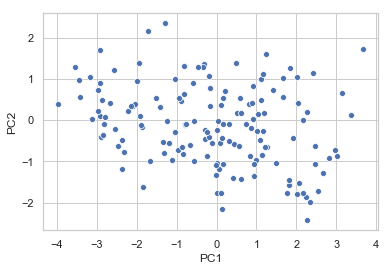

In [24]:
# Principal Component 1 vs. Principal Component 2
ax = sns.scatterplot(x='PC1', y='PC2', data=df_data_norm_pca_non_outliers[['PC1','PC2']])

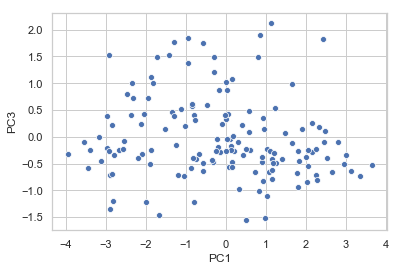

In [25]:
# Principal Component 1 vs. Principal Component 3
ax = sns.scatterplot(x='PC1', y='PC3', data=df_data_norm_pca_non_outliers[['PC1','PC3']])

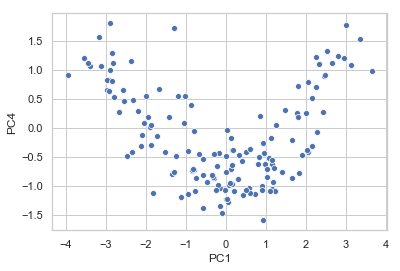

In [26]:
# Principal Component 1 vs. Principal Component 4
ax = sns.scatterplot(x='PC1', y='PC4', data=df_data_norm_pca_non_outliers[['PC1','PC4']])

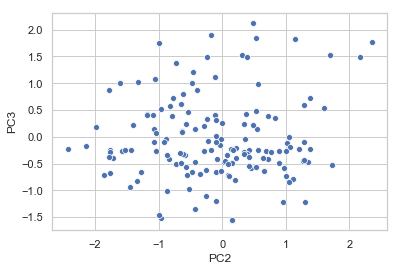

In [27]:
# Principal Component 2 vs. Principal Component 3
ax = sns.scatterplot(x='PC2', y='PC3', data=df_data_norm_pca_non_outliers[['PC2','PC3']])

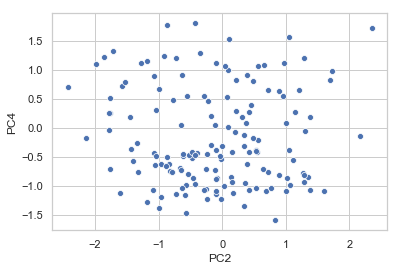

In [28]:
# Principal Component 2 vs. Principal Component 4
ax = sns.scatterplot(x='PC2', y='PC4', data=df_data_norm_pca_non_outliers[['PC2','PC4']])

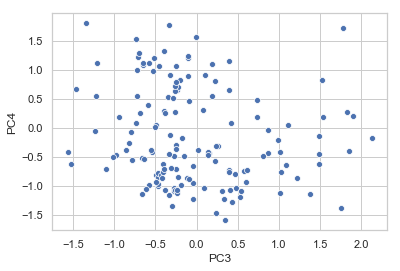

In [29]:
# Principal Component 3 vs. Principal Component 4
ax = sns.scatterplot(x='PC3', y='PC4', data=df_data_norm_pca_non_outliers[['PC3','PC4']])

----

## Pre K-Means Clustering Analysis

#### Hopkins Analysis

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(df_data_norm_pca_non_outliers)

0.7732728734783774

**Note**: According to external reference, a value for higher than 0.75 indicates a clustering tendency at the 90% confidence level. Thus we are good to proceed with K-Means Clustering

#### Silhouette and Elbow Analysis

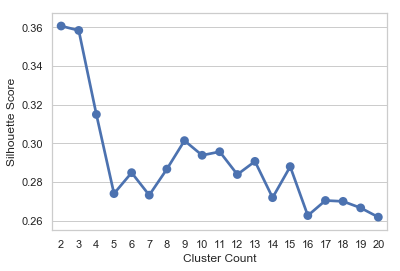

In [32]:
# Performing Silhouette Analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k).fit(df_data_norm_pca_non_outliers)
    sse_.append([k, silhouette_score(df_data_norm_pca_non_outliers, kmeans.labels_)])

df = pd.DataFrame(sse_)
df.columns = ['Cluster Count', 'Silhouette Score']
sns.set(style="whitegrid",font_scale=1)
ax = sns.pointplot(x='Cluster Count', y='Silhouette Score', data=df)

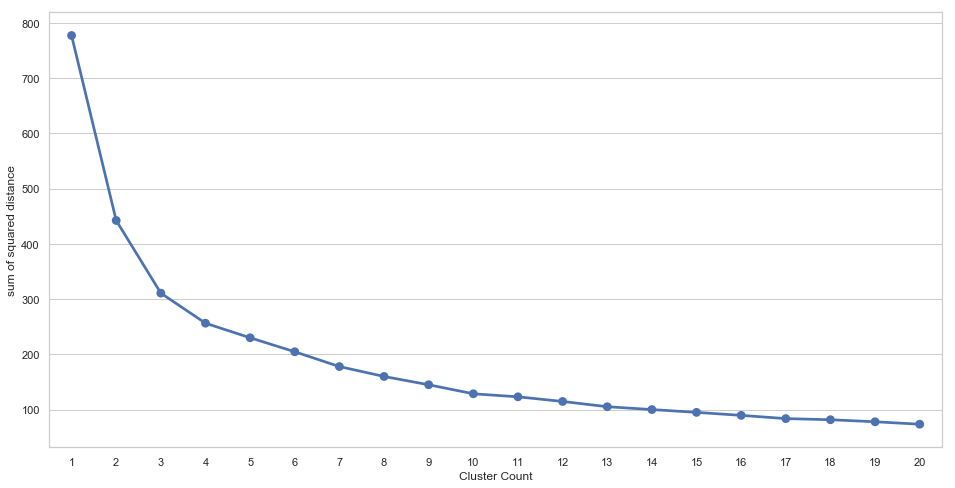

In [33]:
# sum of squared distances (Elbow Curve Analysis)
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_data_norm_pca_non_outliers)
    ssd.append([num_clusters,model_clus.inertia_])

df = pd.DataFrame(ssd)
df.columns = ['Cluster Count','sum of squared distance']
plt.figure(figsize = (16,8))
sns.set(style="whitegrid",font_scale=1)
ax = sns.pointplot(x='Cluster Count', y='sum of squared distance', data=df)

**Note**: From the above plots, we conclude that the optimal value of K (number of clusters) could be between 5, 6 or 7.

## K Means with K as 5

In [34]:
# K-Means with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_data_norm_pca_non_outliers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
cluster_id = pd.DataFrame(model_clus5.labels_)
cluster_id.index = df_data_norm_pca_non_outliers.index
cluster_id.columns = ['ClusterID']
cluster_id.shape

(149, 1)

In [36]:
df_data_clustered = pd.concat([df_data, cluster_id], axis=1)
df_data_clustered.head()

child_mort  exports  health  imports  income  inflation  \
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  ClusterID  
Afghanistan                56.2       5.82    553        1.0  
Albania                    76.3       1.65   4090        0.0  
Algeria                    76.5       2.89   4460        4.0  
Angola                     60.1       6.16   3530        1.0  
Antigua and Barbuda        76.8       2.13  12200        0.0

In [37]:
km_clusters_child_mort = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).gdpp.mean())

In [38]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

ClusterID  child_mort    exports     health    imports        income  \
0          0   10.500000  49.720000   7.314000  55.177500  18490.250000   
1          1   93.360000  26.626000   5.916000  38.002857   3245.228571   
2          2   36.771429  47.200000   5.601905  61.828571   6090.000000   
3          3    4.190000  41.035000  10.146500  39.105000  37945.000000   
4          4   29.351515  30.820879   5.142424  29.286845  13035.151515   

   inflation  life_expec  total_fer          gdpp  
0   3.841075   75.482500   1.735250  11442.000000  
1  10.044429   59.891429   5.303714   1580.114286  
2   6.371667   67.595238   3.160952   3071.142857  
3   1.160800   80.930000   1.812500  41690.000000  
4  12.251394   72.072727   2.556061   5836.303030

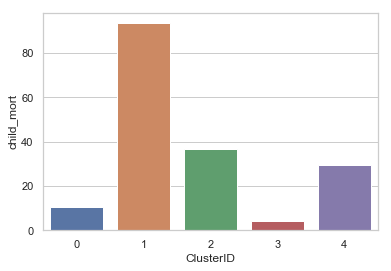

In [39]:
# Higher child_mort will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.child_mort)

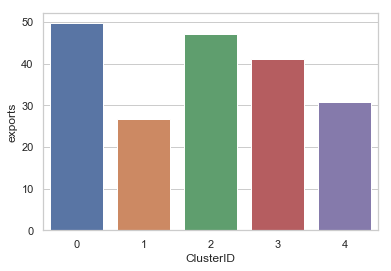

In [40]:
# Lesser exports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.exports)

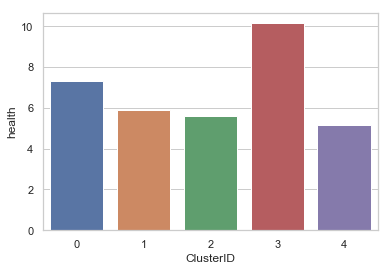

In [41]:
# Lesser health will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.health)

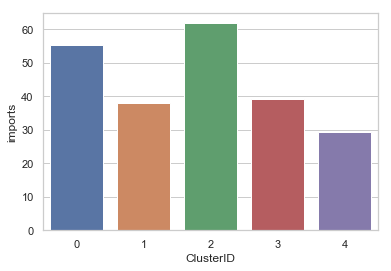

In [42]:
# Higher imports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.imports)

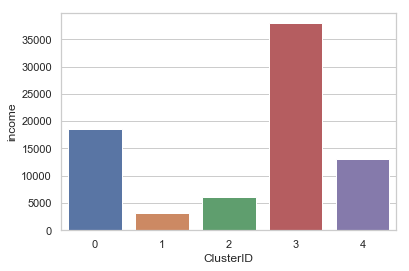

In [43]:
# Lesser income will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.income)

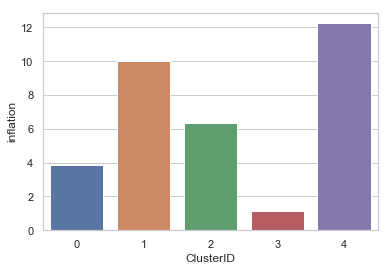

In [44]:
# Higher inflation will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.inflation)

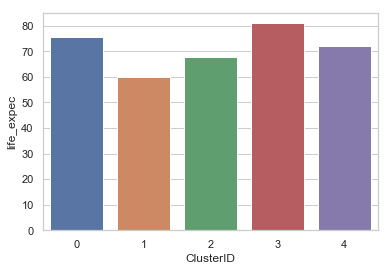

In [45]:
# Lower life_expec will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.life_expec)

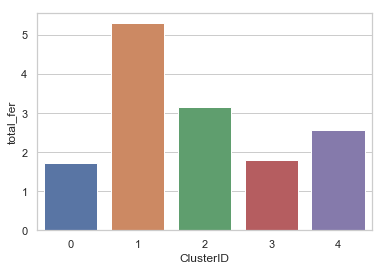

In [46]:
# Higher total_fer will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.total_fer)

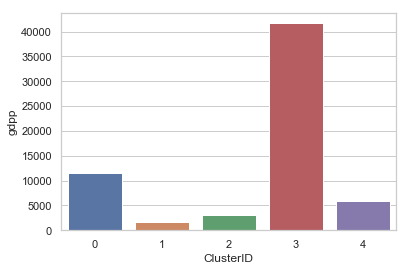

In [47]:
# Lower gdpp will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [48]:
# Automatically Selecting best cluster as per our business logic 
# Normalizing
df_data_clustered_norm = (df-df.mean())/df.std()
df_data_clustered_norm.drop(columns=['ClusterID'], inplace=True)

# Adding Score column
weights = np.array([1,-1,-1,1,-1,1,-1,1,-1])
score = df_data_clustered_norm.apply(lambda a:np.dot(a,weights),axis=1)
best_cluster_id = score.argmax(axis=0)

k5_set = set(df_data_clustered[df_data_clustered['ClusterID']==best_cluster_id].index)
print(k5_set)

{'Comoros', 'Angola', 'Kenya', 'Benin', 'Congo, Dem. Rep.', 'Pakistan', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Ghana', 'Guinea-Bissau', 'Malawi', 'Chad', 'Eritrea', 'Rwanda', 'Madagascar', 'Equatorial Guinea', 'Mauritania', 'Central African Republic', 'Guinea', 'Sudan', 'Mozambique', 'Timor-Leste', 'Cameroon', 'Tanzania', 'Burkina Faso', 'South Africa', 'Gambia', 'Senegal', 'Yemen', 'Zambia', 'Burundi'}


## K Means with K as 6

In [49]:
# K-Means with K=6
model_clus6 = KMeans(n_clusters = 6, max_iter=50)
model_clus6.fit(df_data_norm_pca_non_outliers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
cluster_id = pd.DataFrame(model_clus6.labels_)
cluster_id.index = df_data_norm_pca_non_outliers.index
cluster_id.columns = ['ClusterID']
cluster_id.shape

(149, 1)

In [51]:
df_data_clustered = pd.concat([df_data, cluster_id], axis=1)
df_data_clustered.head()

child_mort  exports  health  imports  income  inflation  \
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  ClusterID  
Afghanistan                56.2       5.82    553        2.0  
Albania                    76.3       1.65   4090        4.0  
Algeria                    76.5       2.89   4460        0.0  
Angola                     60.1       6.16   3530        2.0  
Antigua and Barbuda        76.8       2.13  12200        4.0

In [52]:
km_clusters_child_mort = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).gdpp.mean())

In [53]:
df = pd.concat([pd.Series([0,1,2,3,4,5]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

ClusterID  child_mort    exports     health    imports        income  \
0          0   31.140741  31.269963   4.827037  29.435774  12061.851852   
1          1    7.717647  71.864706   6.668824  65.411765  29641.176471   
2          2   93.360000  26.626000   5.916000  38.002857   3245.228571   
3          3   36.047619  48.366667   5.656190  62.180952   6389.047619   
4          4   14.209677  35.316129   7.655161  45.825806  13571.612903   
5          5    4.172222  35.627778  10.168889  34.494444  37338.888889   

   inflation  life_expec  total_fer          gdpp  
0  13.369259   71.233333   2.601852   5098.444444  
1   3.571059   77.176471   1.824706  20578.235294  
2  10.044429   59.891429   5.303714   1580.114286  
3   6.879286   67.538095   3.133333   3061.619048  
4   4.008419   74.967742   1.838065   8260.967742  
5   1.364222   81.011111   1.796667  41150.000000

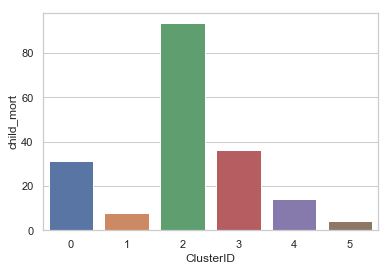

In [54]:
# Higher child_mort will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.child_mort)

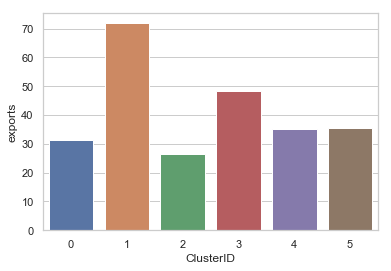

In [55]:
# Lesser exports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.exports)

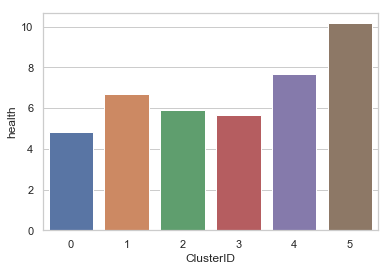

In [56]:
# Lesser health will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.health)

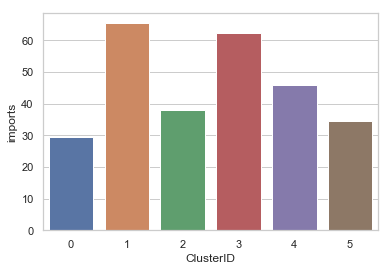

In [57]:
# Higher imports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.imports)

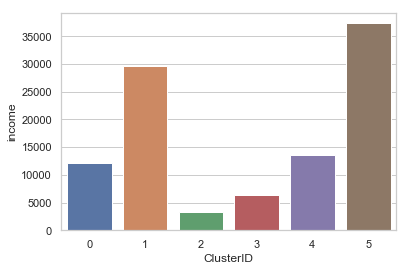

In [58]:
# Lesser income will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.income)

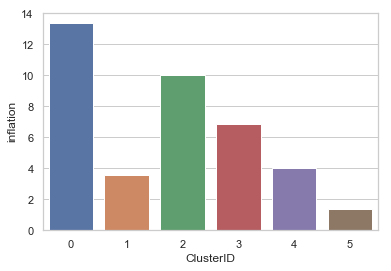

In [59]:
# Higher inflation will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.inflation)

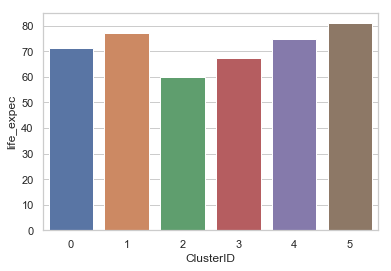

In [60]:
# Lower life_expec will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.life_expec)

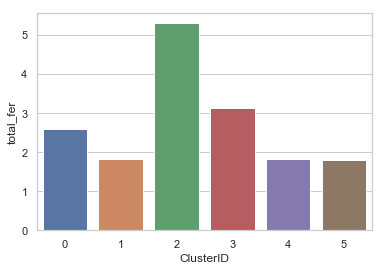

In [61]:
# Higher total_fer will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.total_fer)

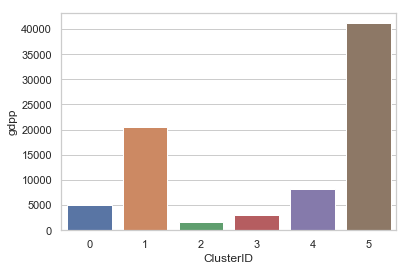

In [62]:
# Lower gdpp will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [63]:
# Automatically Selecting best cluster as per our business logic 
# Normalizing
df_data_clustered_norm = (df-df.mean())/df.std()
df_data_clustered_norm.drop(columns=['ClusterID'], inplace=True)

# Adding Score column
weights = np.array([1,-1,-1,1,-1,1,-1,1,-1])
score = df_data_clustered_norm.apply(lambda a:np.dot(a,weights),axis=1)
best_cluster_id = score.argmax(axis=0)

k6_set = set(df_data_clustered[df_data_clustered['ClusterID']==best_cluster_id].index)
print(k6_set)

{'Comoros', 'Angola', 'Kenya', 'Benin', 'Congo, Dem. Rep.', 'Pakistan', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Ghana', 'Guinea-Bissau', 'Malawi', 'Chad', 'Eritrea', 'Rwanda', 'Madagascar', 'Equatorial Guinea', 'Mauritania', 'Central African Republic', 'Guinea', 'Sudan', 'Mozambique', 'Timor-Leste', 'Cameroon', 'Tanzania', 'Burkina Faso', 'South Africa', 'Gambia', 'Senegal', 'Yemen', 'Zambia', 'Burundi'}


## K Means with K as 7

In [64]:
# K-Means with K=7
model_clus7 = KMeans(n_clusters = 7, max_iter=50)
model_clus7.fit(df_data_norm_pca_non_outliers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
cluster_id = pd.DataFrame(model_clus7.labels_)
cluster_id.index = df_data_norm_pca_non_outliers.index
cluster_id.columns = ['ClusterID']
cluster_id.shape

(149, 1)

In [66]:
df_data_clustered = pd.concat([df_data, cluster_id], axis=1)
df_data_clustered.head()

child_mort  exports  health  imports  income  inflation  \
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  ClusterID  
Afghanistan                56.2       5.82    553        0.0  
Albania                    76.3       1.65   4090        1.0  
Algeria                    76.5       2.89   4460        2.0  
Angola                     60.1       6.16   3530        4.0  
Antigua and Barbuda        76.8       2.13  12200        5.0

In [67]:
km_clusters_child_mort = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).gdpp.mean())

In [68]:
df = pd.concat([pd.Series([0,1,2,3,4,5,6]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

ClusterID  child_mort    exports     health    imports        income  \
0          0  102.368182  23.632727   6.641364  37.768182   1572.409091   
1          1   13.584615  34.050000   8.035769  44.011538  13502.307692   
2          2   30.326087  27.603870   4.743478  27.955039  11315.652174   
3          3    4.189474  37.773684  10.196842  36.610526  37536.842105   
4          4   70.389474  36.378421   4.800526  40.605263   6635.789474   
5          5    8.661905  67.271429   6.231905  62.861905  26757.142857   
6          6   32.131579  46.736842   5.785789  62.042105   6476.315789   

   inflation  life_expec  total_fer          gdpp  
0   8.186591   58.009091   5.710455    791.954545  
1   4.503346   75.215385   1.818077   8289.615385  
2  11.929130   71.778261   2.459130   4767.739130  
3   1.391368   80.957895   1.800000  41321.052632  
4  15.065789   63.689474   4.362632   3073.631579  
5   4.280286   76.276190   1.815238  16907.619048  
6   4.862158   68.378947   3.018421   3300.315789

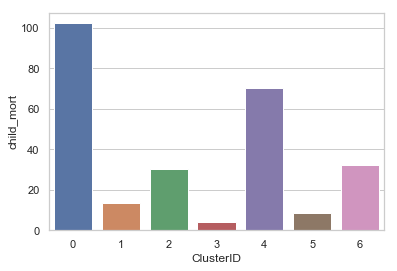

In [69]:
# Higher child_mort will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.child_mort)

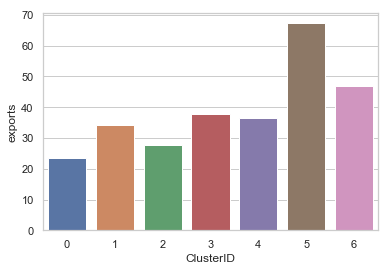

In [70]:
# Lesser exports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.exports)

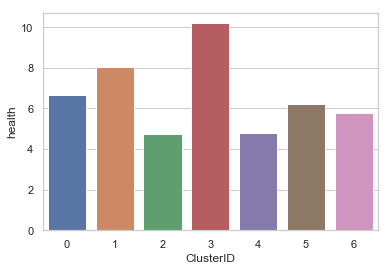

In [71]:
# Lesser health will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.health)

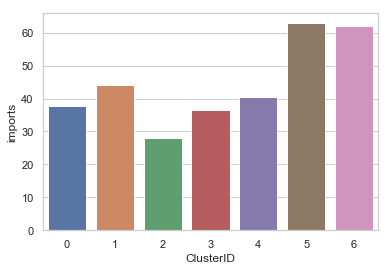

In [72]:
# Higher imports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.imports)

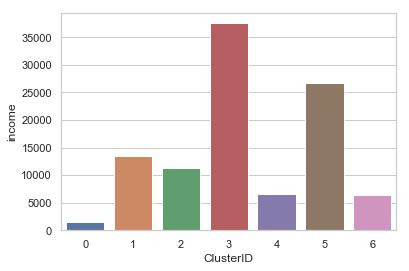

In [73]:
# Lesser income will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.income)

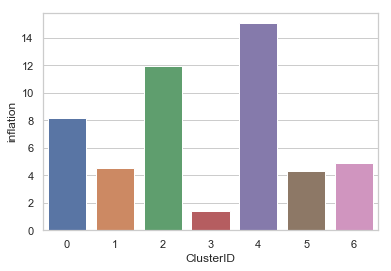

In [74]:
# Higher inflation will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.inflation)

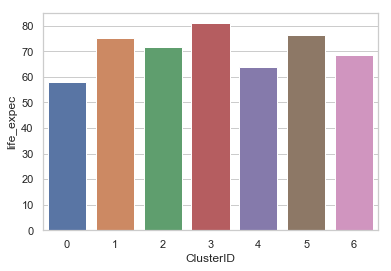

In [75]:
# Lower life_expec will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.life_expec)

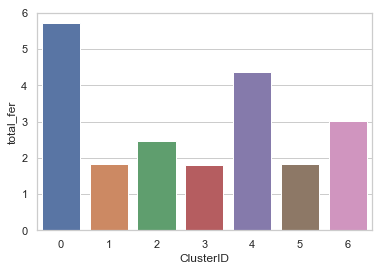

In [76]:
# Higher total_fer will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.total_fer)

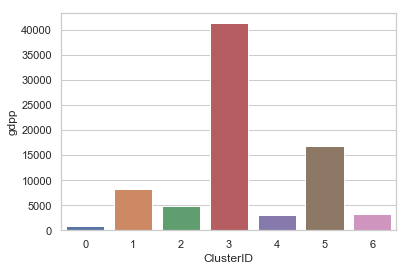

In [77]:
# Lower gdpp will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [78]:
# Automatically Selecting best cluster as per our business logic 
# Normalizing
df_data_clustered_norm = (df-df.mean())/df.std()
df_data_clustered_norm.drop(columns=['ClusterID'], inplace=True)

# Adding Score column
weights = np.array([1,-1,-1,1,-1,1,-1,1,-1])
score = df_data_clustered_norm.apply(lambda a:np.dot(a,weights),axis=1)
best_cluster_id = score.argmax(axis=0)

k7_set = set(df_data_clustered[df_data_clustered['ClusterID']==best_cluster_id].index)
print(k7_set)

{'Benin', 'Congo, Dem. Rep.', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Guinea-Bissau', 'Malawi', 'Chad', 'Rwanda', 'Central African Republic', 'Guinea', 'Mozambique', 'Timor-Leste', 'Cameroon', 'Tanzania', 'Burkina Faso', 'Gambia', 'Zambia', 'Burundi'}


In [79]:
# Consolidated list of countries
print(k5_set | k6_set | k7_set)

{'Comoros', 'Angola', 'Kenya', 'Benin', 'Congo, Dem. Rep.', 'Pakistan', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Ghana', 'Guinea-Bissau', 'Malawi', 'Chad', 'Eritrea', 'Rwanda', 'Madagascar', 'Equatorial Guinea', 'Mauritania', 'Central African Republic', 'Guinea', 'Sudan', 'Mozambique', 'Timor-Leste', 'Cameroon', 'Tanzania', 'Burkina Faso', 'South Africa', 'Gambia', 'Senegal', 'Yemen', 'Zambia', 'Burundi'}


----

## Hierarchical Clustering Single Method

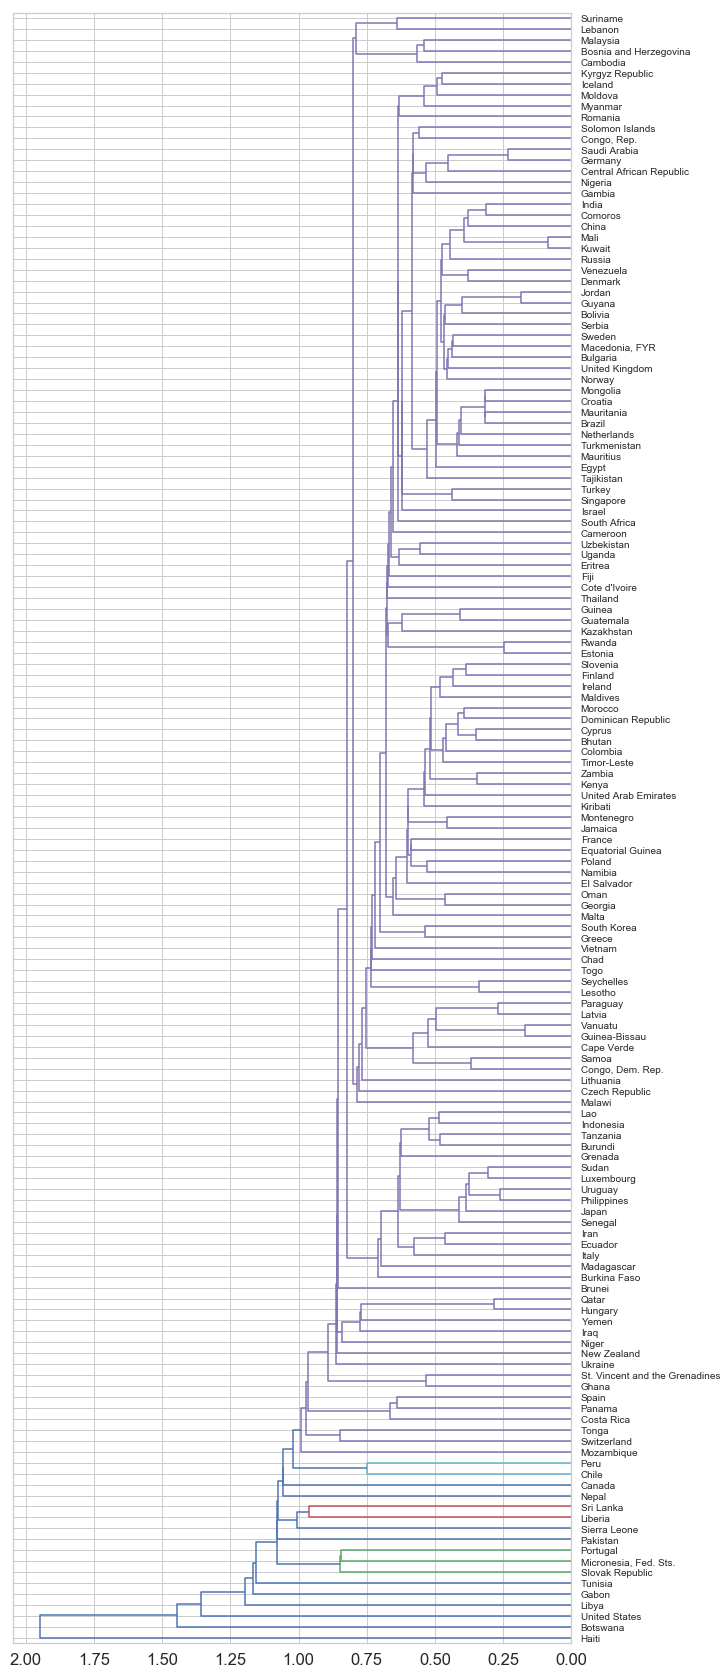

In [80]:
# heirarchical clustering method 'single' color_threshold (height of cut) = 1
plt.figure(figsize = (10,30))
sns.set(style="whitegrid",font_scale=1.5)
mergings = linkage(df_data_norm_pca_non_outliers, method = "single", metric='euclidean')

dendrogram(mergings, labels=df_data.index, leaf_font_size=10, orientation='left', color_threshold=1)

from scipy import cluster
cutree = cluster.hierarchy.cut_tree(mergings, height=1)

In [81]:
df_cutree = pd.DataFrame(cutree)
df_cutree.index = df_data_norm_pca_non_outliers.index
df_cutree.columns = ['ClusterID']
print(df_cutree['ClusterID'].unique())
df_cutree.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


ClusterID
country                       
Afghanistan                  0
Albania                      0
Algeria                      0
Angola                       1
Antigua and Barbuda          0

In [82]:
cluster_id = df_cutree
cluster_id.shape

(149, 1)

In [83]:
df_data_clustered = pd.concat([df_data, cluster_id], axis=1)
df_data_clustered.head()

child_mort  exports  health  imports  income  inflation  \
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  ClusterID  
Afghanistan                56.2       5.82    553        0.0  
Albania                    76.3       1.65   4090        0.0  
Algeria                    76.5       2.89   4460        0.0  
Angola                     60.1       6.16   3530        1.0  
Antigua and Barbuda        76.8       2.13  12200        0.0

In [84]:
km_clusters_child_mort = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).gdpp.mean())

In [85]:
df = pd.concat([pd.Series(df_cutree['ClusterID'].unique()), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

ClusterID  child_mort     exports     health    imports       income  \
0           0   35.890909   36.105985   6.718636  43.651515  13179.94697   
1           1  119.000000   62.300000   2.850000  42.900000   5900.00000   
2           2    8.600000   69.500000   4.970000  50.900000  41100.00000   
3           3    4.500000   74.200000  11.300000  69.150000  43300.00000   
4           4   63.900000   85.100000   2.460000  54.700000   5190.00000   
5           5  111.000000   85.800000   4.480000  58.900000  33700.00000   
6           6   45.300000   34.000000   8.675000  30.750000  12350.00000   
7           7    4.200000  103.000000   9.190000  86.500000  45700.00000   
8           8   14.666667   60.300000   3.646667  38.766667  40100.00000   
9           9   97.400000   50.700000   4.410000  61.200000   3320.00000   
10         10   64.400000    0.109000   1.970000   0.065900   3720.00000   
11         11   63.600000   12.000000  10.500000  30.000000   1350.00000   
12         12   90.300000   40.200000   7.650000  57.300000   1210.00000   
13         13    8.600000   77.700000   3.660000  63.600000  57600.00000   

    inflation  life_expec  total_fer          gdpp  
0    6.662023   70.832576   2.907424   9967.325758  
1   22.400000   60.100000   6.160000   3530.000000  
2    7.440000   76.000000   2.160000  20700.000000  
3    1.364000   80.350000   1.825000  47350.000000  
4   20.700000   60.400000   4.950000   2740.000000  
5   24.900000   60.900000   5.210000  17100.000000  
6   11.475000   60.750000   3.575000   5890.000000  
7   -3.220000   80.400000   2.050000  48700.000000  
8   15.666667   75.766667   2.756667  16900.000000  
9   18.900000   68.200000   4.980000   1200.000000  
10   7.040000   66.800000   2.410000    988.000000  
11   2.610000   64.600000   4.510000    563.000000  
12   1.180000   58.700000   4.870000    488.000000  
13  12.500000   76.500000   1.870000  35000.000000

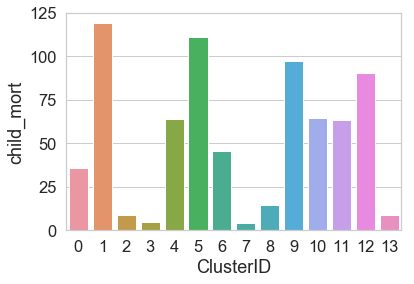

In [86]:
# Higher child_mort will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.child_mort)

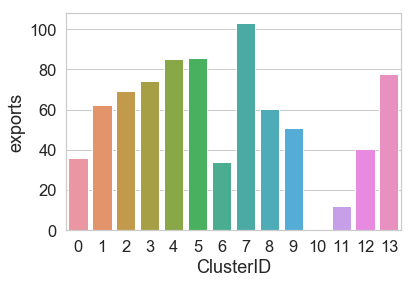

In [87]:
# Lesser exports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.exports)

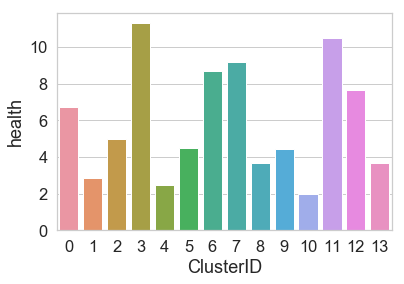

In [88]:
# Lesser health will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.health)

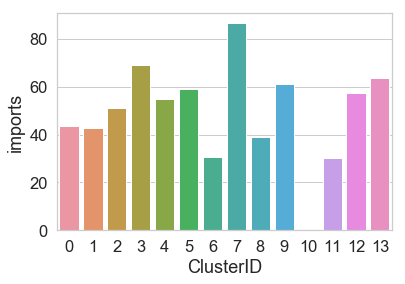

In [89]:
# Higher imports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.imports)

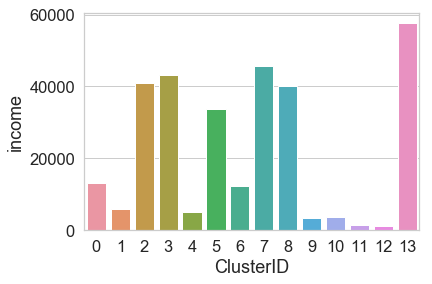

In [90]:
# Lesser income will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.income)

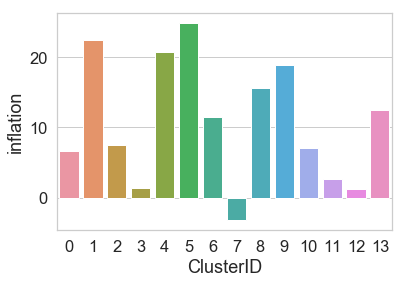

In [91]:
# Higher inflation will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.inflation)

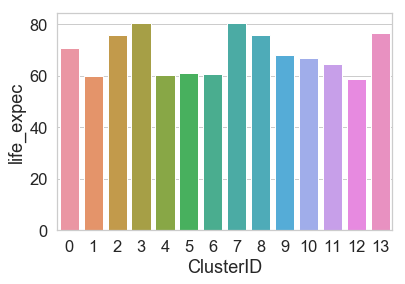

In [92]:
# Lower life_expec will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.life_expec)

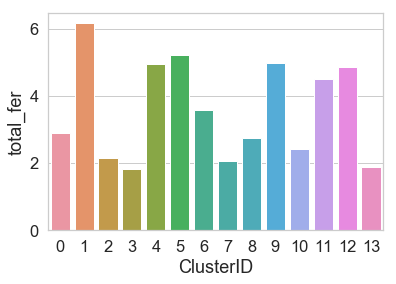

In [93]:
# Higher total_fer will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.total_fer)

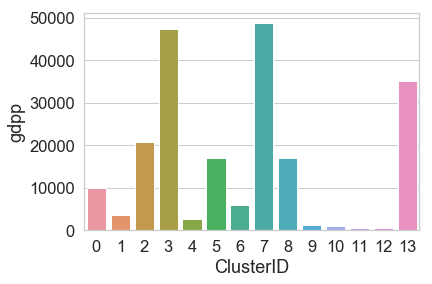

In [94]:
# Lower gdpp will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [95]:
# Automatically Selecting best cluster as per our business logic 
# Normalizing
df_data_clustered_norm = (df-df.mean())/df.std()
df_data_clustered_norm.drop(columns=['ClusterID'], inplace=True)

# Adding Score column
weights = np.array([1,-1,-1,1,-1,1,-1,1,-1])
score = df_data_clustered_norm.apply(lambda a:np.dot(a,weights),axis=1)
best_cluster_id = score.argmax(axis=0)

hc_s_set = set(df_data_clustered[df_data_clustered['ClusterID']==best_cluster_id].index)
print(hc_s_set)

{'Angola'}


**Note**: We do not have a good cluster formation in this case, hence moving to next type of Hierarchichal clustering, i.e. Method Complete

----

## Hierarchical Clustering Complete Method

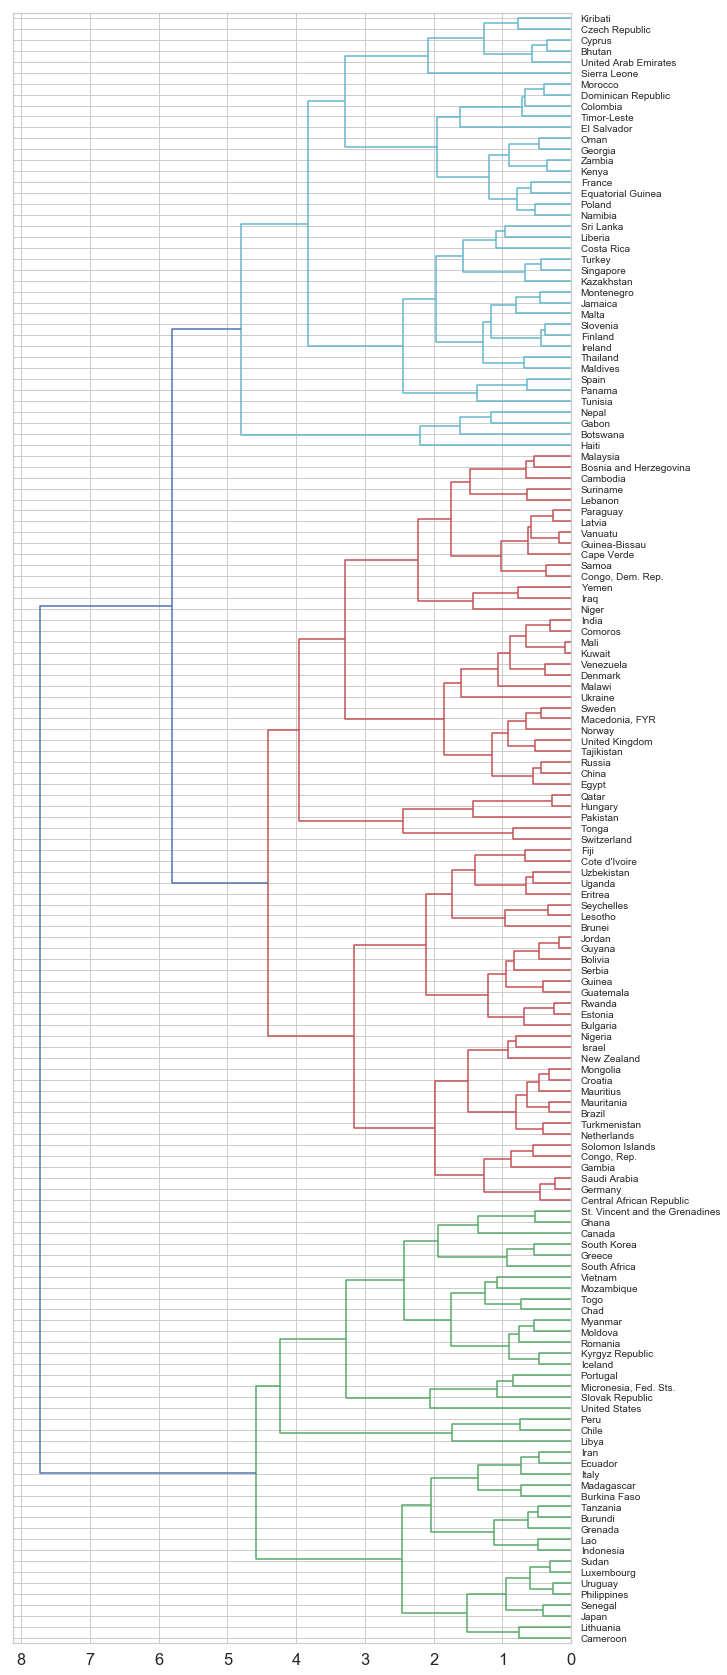

In [96]:
# heirarchical clustering method 'complete' color_threshold (height of cut) = 5
plt.figure(figsize = (10,30))
sns.set(style="whitegrid",font_scale=1.5)
mergings = linkage(df_data_norm_pca_non_outliers, method = "complete", metric='euclidean')

dendrogram(mergings, labels=df_data.index, leaf_font_size=10, orientation='left', color_threshold=5)

from scipy import cluster
cutree = cluster.hierarchy.cut_tree(mergings, height=5)

In [97]:
df_cutree = pd.DataFrame(cutree)
df_cutree.index = df_data_norm_pca_non_outliers.index
df_cutree.columns = ['ClusterID']
print(df_cutree['ClusterID'].unique())
df_cutree.head()

[0 1 2]


ClusterID
country                       
Afghanistan                  0
Albania                      1
Algeria                      1
Angola                       0
Antigua and Barbuda          1

In [98]:
cluster_id = df_cutree
cluster_id.shape

(149, 1)

In [99]:
df_data_clustered = pd.concat([df_data, cluster_id], axis=1)
df_data_clustered.head()

child_mort  exports  health  imports  income  inflation  \
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  ClusterID  
Afghanistan                56.2       5.82    553        0.0  
Albania                    76.3       1.65   4090        1.0  
Algeria                    76.5       2.89   4460        1.0  
Angola                     60.1       6.16   3530        0.0  
Antigua and Barbuda        76.8       2.13  12200        1.0

In [100]:
km_clusters_child_mort = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).gdpp.mean())

In [101]:
df = pd.concat([pd.Series(df_cutree['ClusterID'].unique()), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

ClusterID  child_mort    exports    health    imports        income  \
0          0   84.127500  31.115500  6.123000  43.690000   4069.825000   
1          1   27.042029  34.325783  6.087681  41.161825  10329.855072   
2          2    7.030000  53.415000  8.123000  49.910000  32364.750000   

   inflation  life_expec  total_fer         gdpp  
0   8.704625   60.385000   4.997750   1979.25000  
1   8.331290   72.143478   2.435942   5325.15942  
2   3.586775   78.467500   1.850750  28931.75000

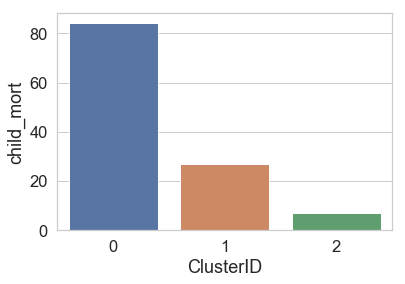

In [102]:
# Higher child_mort will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.child_mort)

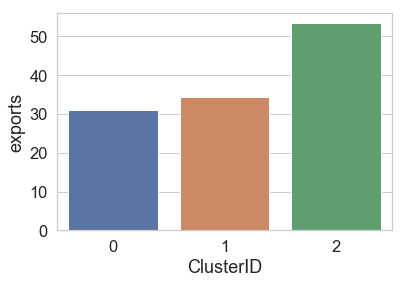

In [103]:
# Lesser exports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.exports)

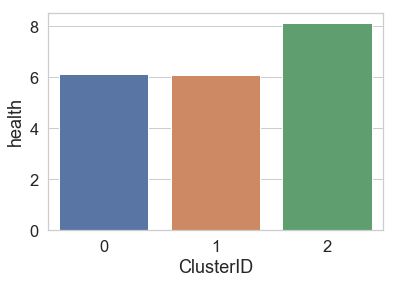

In [104]:
# Lesser health will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.health)

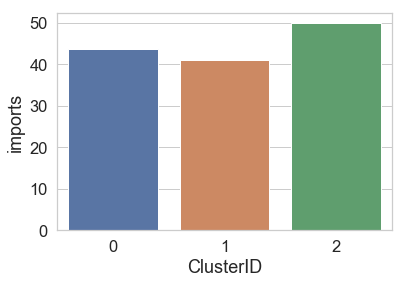

In [105]:
# Higher imports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.imports)

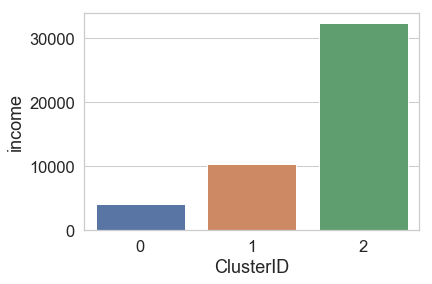

In [106]:
# Lesser income will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.income)

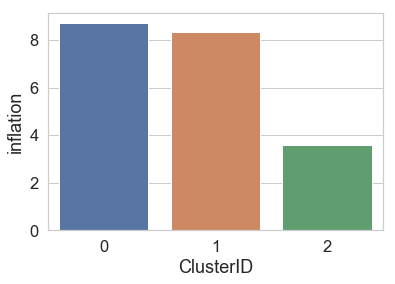

In [107]:
# Higher inflation will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.inflation)

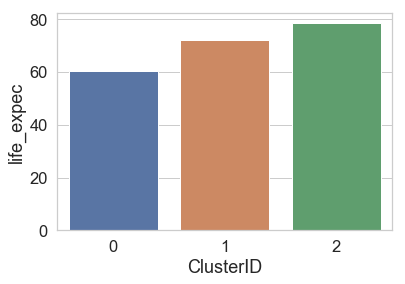

In [108]:
# Lower life_expec will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.life_expec)

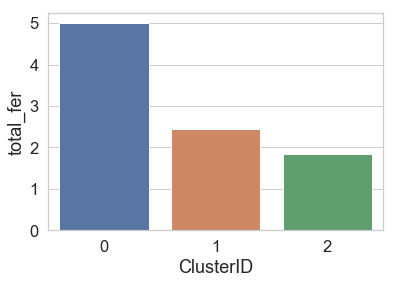

In [109]:
# Higher total_fer will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.total_fer)

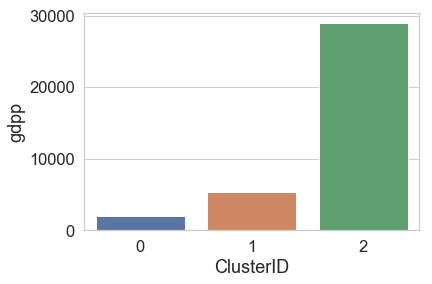

In [110]:
# Lower gdpp will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [111]:
# Automatically Selecting best cluster as per our business logic 
# Normalizing
df_data_clustered_norm = (df-df.mean())/df.std()
df_data_clustered_norm.drop(columns=['ClusterID'], inplace=True)

# Adding Score column
weights = np.array([1,-1,-1,1,-1,1,-1,1,-1])
score = df_data_clustered_norm.apply(lambda a:np.dot(a,weights),axis=1)
best_cluster_id = score.argmax(axis=0)

hc_c_set = set(df_data_clustered[df_data_clustered['ClusterID']==best_cluster_id].index)
print(hc_c_set)

{'Comoros', 'Lao', 'Angola', 'Kenya', 'Benin', 'Tonga', 'Congo, Rep.', 'Namibia', 'Congo, Dem. Rep.', 'Guatemala', 'Tajikistan', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Ghana', 'Guinea-Bissau', 'Malawi', 'Chad', 'Rwanda', 'Madagascar', 'Solomon Islands', 'Equatorial Guinea', 'Mauritania', 'Botswana', 'Samoa', 'Central African Republic', 'Guinea', 'Mozambique', 'Cameroon', 'Tanzania', 'Iraq', 'Burkina Faso', 'South Africa', 'Gambia', 'Senegal', 'Zambia', 'Burundi'}


----

## Combined list of countries from K-Means and Hierarchical Clustering

In [112]:
print((hc_c_set)&(k5_set | k6_set | k7_set))

{'Comoros', 'Angola', 'Kenya', 'Benin', 'Congo, Dem. Rep.', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Ghana', 'Guinea-Bissau', 'Malawi', 'Chad', 'Rwanda', 'Madagascar', 'Equatorial Guinea', 'Mauritania', 'Central African Republic', 'Guinea', 'Mozambique', 'Cameroon', 'Tanzania', 'Burkina Faso', 'South Africa', 'Gambia', 'Senegal', 'Zambia', 'Burundi'}


----

## Analysis of Outlier that were dropped

**Note**: Since we dropped outliers (countries with extreme high/low values), we might have missed the countries in extreme need of help, thus adding them back. We do so by clustering the outliers again since it contains countries with extreme good or extreme bad situation.

In [113]:
df_data_norm_pca_outliers

PC1       PC2       PC3       PC4
country                                                      
Brunei                 2.452710  0.016405  3.010785  0.774511
Haiti                 -4.396495  1.737006 -1.458422  1.788214
Kiribati              -1.235501  0.368032 -2.361173  0.590455
Kuwait                 2.458265  0.087786  2.644315  0.706759
Lesotho               -1.797745  2.031740 -2.489398  1.068984
Liberia               -1.768262  1.050240 -2.383273  1.176032
Luxembourg             6.897012  4.835301  0.998833  3.120258
Malta                  3.668509  4.751197 -1.018251 -0.499605
Micronesia, Fed. Sts. -0.379787  0.101468 -2.705947  0.769659
Nigeria               -4.897337 -0.094215  6.091837  2.405188
Norway                 3.710037 -1.442915  0.885366  2.756050
Qatar                  4.229576 -0.195017  3.632949  2.382645
Seychelles             1.597792  2.930308 -0.385532 -1.396172
Sierra Leone          -3.371485 -0.235593 -1.360163  2.574234
Singapore              5.766035  6.662054  0.652458  0.089369
Switzerland            4.076285 -0.428174 -0.260763  2.300169
United States          2.633286 -2.988377 -1.716715  2.818633
Venezuela             -0.549383 -1.230186  3.092051 -0.114965

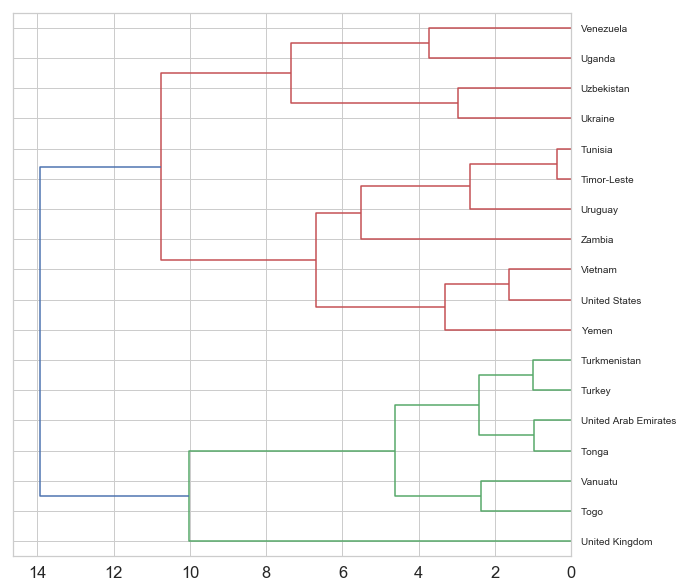

In [114]:
# heirarchical clustering method 'complete' color_threshold (height of cut) = 13
plt.figure(figsize = (10,10))
sns.set(style="whitegrid",font_scale=1.5)
mergings = linkage(df_data_norm_pca_outliers, method = "complete", metric='euclidean')

dendrogram(mergings, labels=df_data.index, leaf_font_size=10, orientation='left', color_threshold=13)

from scipy import cluster
cutree = cluster.hierarchy.cut_tree(mergings, height=13)

In [115]:
df_cutree = pd.DataFrame(cutree)
df_cutree.index = df_data_norm_pca_outliers.index
df_cutree.columns = ['ClusterID']
print(df_cutree['ClusterID'].unique())
df_cutree.head()

[0 1]


ClusterID
country            
Brunei            0
Haiti             1
Kiribati          1
Kuwait            0
Lesotho           1

In [116]:
cluster_id = df_cutree
cluster_id.shape

(18, 1)

In [117]:
df_data_clustered = pd.concat([df_data, cluster_id], axis=1)
df_data_clustered.head()

child_mort  exports  health  imports  income  inflation  \
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  ClusterID  
Afghanistan                56.2       5.82    553        NaN  
Albania                    76.3       1.65   4090        NaN  
Algeria                    76.5       2.89   4460        NaN  
Angola                     60.1       6.16   3530        NaN  
Antigua and Barbuda        76.8       2.13  12200        NaN

In [118]:
km_clusters_child_mort = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_data_clustered.groupby(["ClusterID"]).gdpp.mean())

In [119]:
df = pd.concat([pd.Series(df_cutree['ClusterID'].unique()), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
df

ClusterID  child_mort    exports     health    imports        income  \
0          0    8.109091  87.527273   6.804545  70.490909  61545.454545   
1          1  112.814286  21.814286  10.497143  67.300000   2288.571429   

   inflation  life_expec  total_fer          gdpp  
0   8.314636   79.072727   1.845455  50172.727273  
1  20.227143   54.428571   4.284286   1319.714286

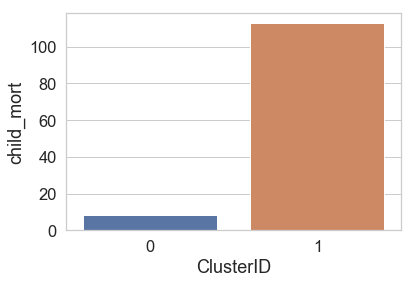

In [120]:
# Higher child_mort will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.child_mort)

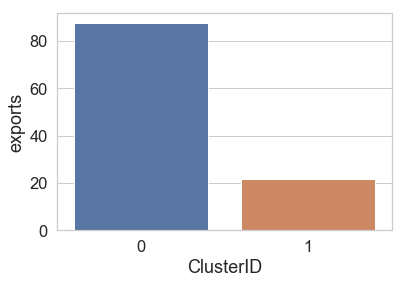

In [121]:
# Lesser exports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.exports)

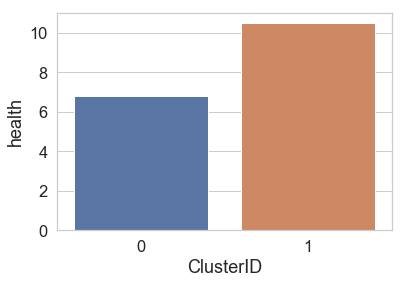

In [122]:
# Lesser health will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.health)

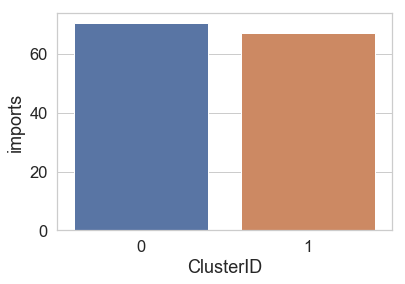

In [123]:
# Higher imports will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.imports)

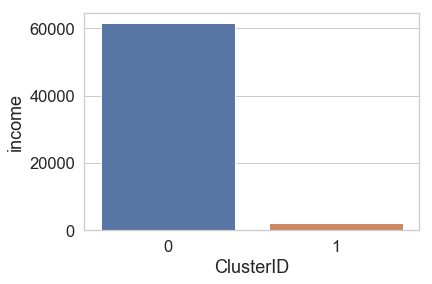

In [124]:
# Lesser income will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.income)

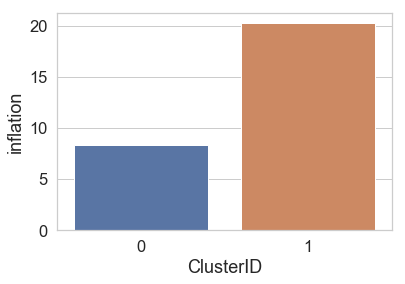

In [125]:
# Higher inflation will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.inflation)

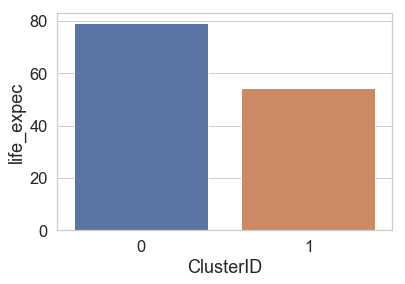

In [126]:
# Lower life_expec will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.life_expec)

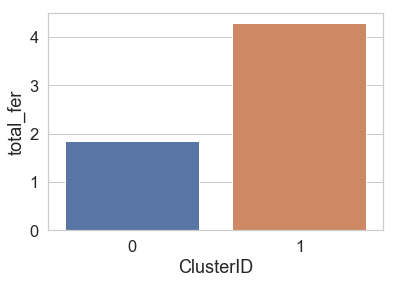

In [127]:
# Higher total_fer will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.total_fer)

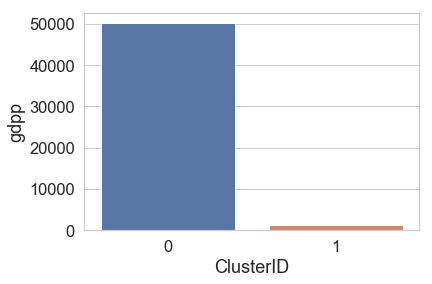

In [128]:
# Lower gdpp will relate to higher funding requirement
sns.barplot(x=df.ClusterID, y=df.gdpp)

**Note**: Though not very clear, but Cluster 1 and Cluster 5 seems to qualify for the funding as per above plots.

In [129]:
# Automatically Selecting best cluster as per our business logic 
# Normalizing
df_data_clustered_norm = (df-df.mean())/df.std()
df_data_clustered_norm.drop(columns=['ClusterID'], inplace=True)

# Adding Score column
weights = np.array([1,-1,-1,1,-1,1,-1,1,-1])
score = df_data_clustered_norm.apply(lambda a:np.dot(a,weights),axis=1)
best_cluster_id = score.argmax(axis=0)

o_hc_c_set = set(df_data_clustered[df_data_clustered['ClusterID']==best_cluster_id].index)
print(o_hc_c_set)

{'Micronesia, Fed. Sts.', 'Liberia', 'Nigeria', 'Haiti', 'Sierra Leone', 'Kiribati', 'Lesotho'}


----

## Combining, Visualizing and Summarizing Results 

In [130]:
# Countries which need help (worst situation)
print(o_hc_c_set)

{'Micronesia, Fed. Sts.', 'Liberia', 'Nigeria', 'Haiti', 'Sierra Leone', 'Kiribati', 'Lesotho'}


In [131]:
# Countries which need help (poor situation)
print((hc_c_set)&(k5_set | k6_set | k7_set))

{'Comoros', 'Angola', 'Kenya', 'Benin', 'Congo, Dem. Rep.', 'Afghanistan', 'Niger', 'Uganda', 'Togo', 'Mali', "Cote d'Ivoire", 'Ghana', 'Guinea-Bissau', 'Malawi', 'Chad', 'Rwanda', 'Madagascar', 'Equatorial Guinea', 'Mauritania', 'Central African Republic', 'Guinea', 'Mozambique', 'Cameroon', 'Tanzania', 'Burkina Faso', 'South Africa', 'Gambia', 'Senegal', 'Zambia', 'Burundi'}


In [132]:
# Verifying the data using visual plots
df_plot = df_data_norm_pca
df_plot['country'] = df_plot.index
def needs_help(x):
    if x in o_hc_c_set:
        return 'Urgently Needed'
    elif x in ((hc_c_set)&(k5_set | k6_set | k7_set)):
        return 'Needed'
    else:
        return 'Not Needed'
df_plot['help'] = df_data_norm_pca.country.apply(needs_help)
df_plot.head()

PC1       PC2       PC3       PC4  \
country                                                       
Afghanistan         -2.904290  0.095334 -0.715965  1.002240   
Albania              0.428622 -0.586392 -0.332486 -1.157577   
Algeria             -0.284370 -0.453810  1.217842 -0.865511   
Angola              -2.923630  1.690471  1.520471  0.837107   
Antigua and Barbuda  1.030477  0.136249 -0.225044 -0.844523   

                                 country        help  
country                                               
Afghanistan                  Afghanistan      Needed  
Albania                          Albania  Not Needed  
Algeria                          Algeria  Not Needed  
Angola                            Angola      Needed  
Antigua and Barbuda  Antigua and Barbuda  Not Needed

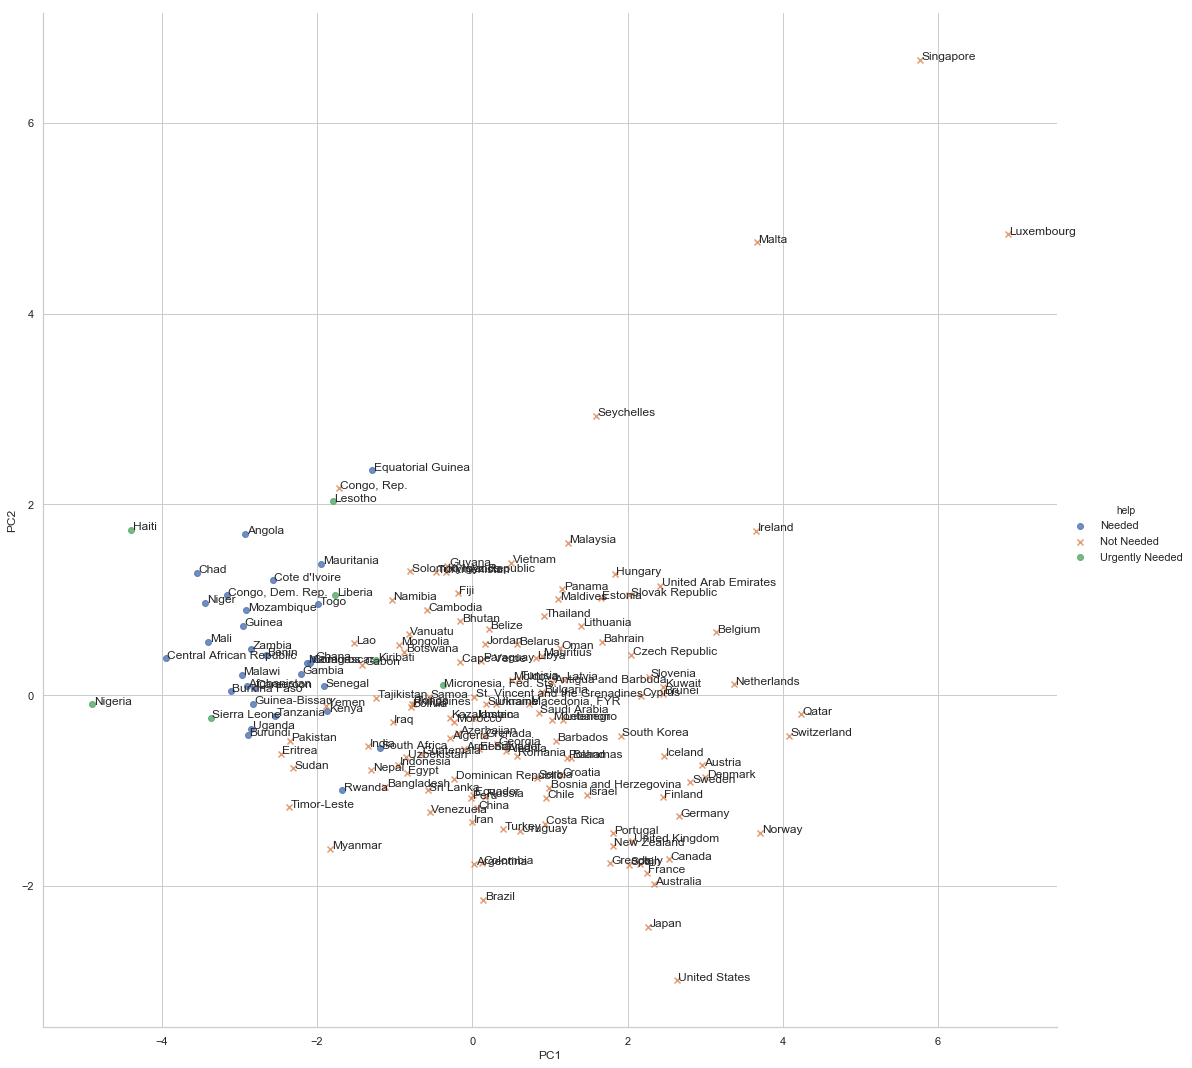

In [133]:
# Plotting PC1 vs PC2 hue by country (need help or not)
sns.set(style="whitegrid",font_scale=1)
ax = sns.lmplot(x="PC1", y="PC2",data=df_plot, height=15, hue="help", fit_reg=False, markers=["o", "x", "o"])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_plot.PC1, df_plot.PC2, df_plot.country, plt.gca())

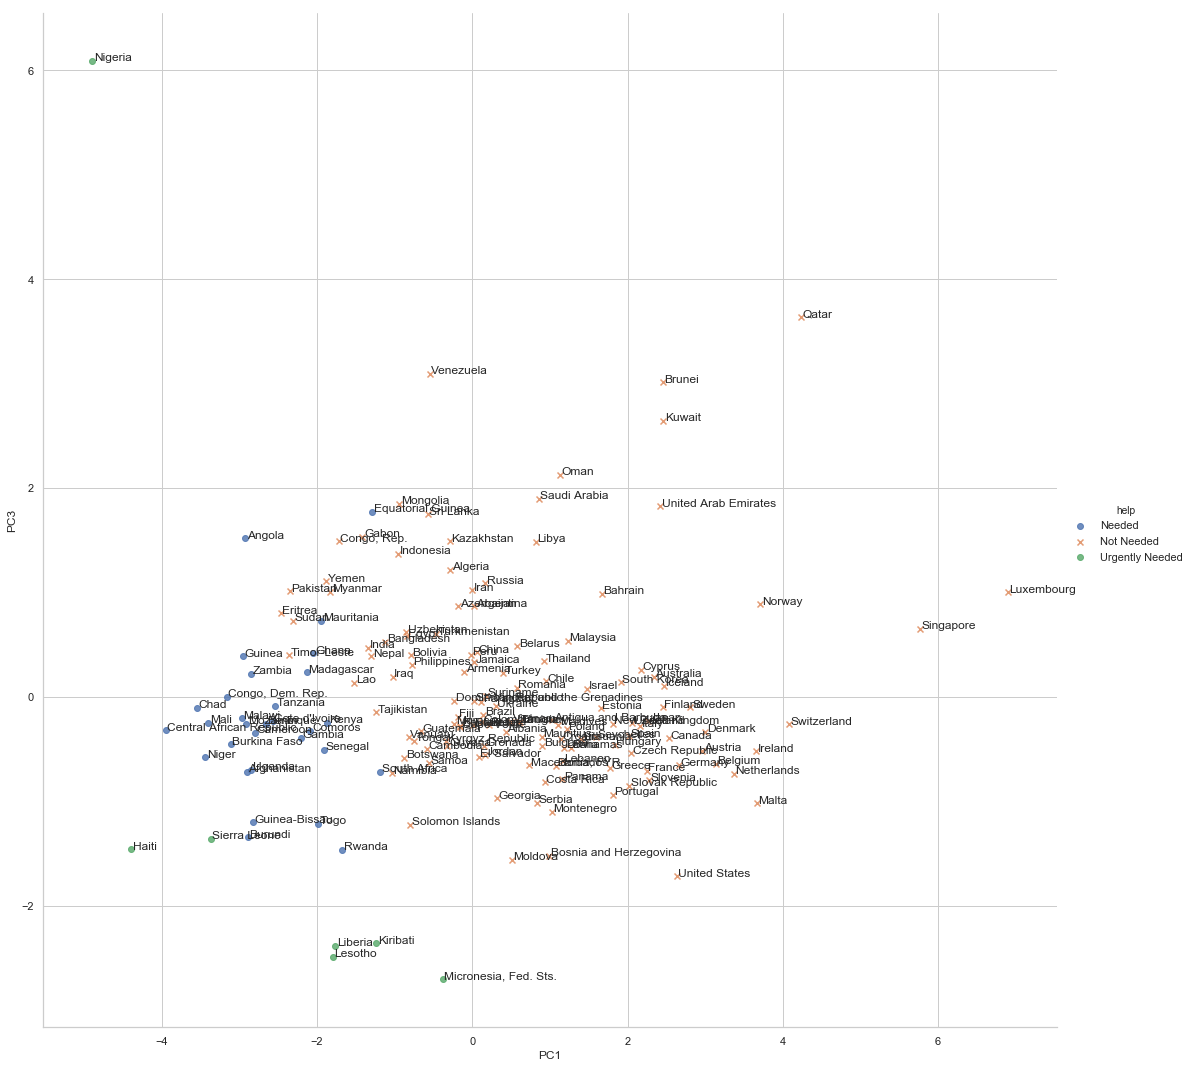

In [134]:
# Plotting PC1 vs PC3 hue by country (need help or not)
sns.set(style="whitegrid",font_scale=1)
ax = sns.lmplot(x="PC1", y="PC3",data=df_plot, height=15, hue="help", fit_reg=False, markers=["o", "x", "o"])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_plot.PC1, df_plot.PC3, df_plot.country, plt.gca())  

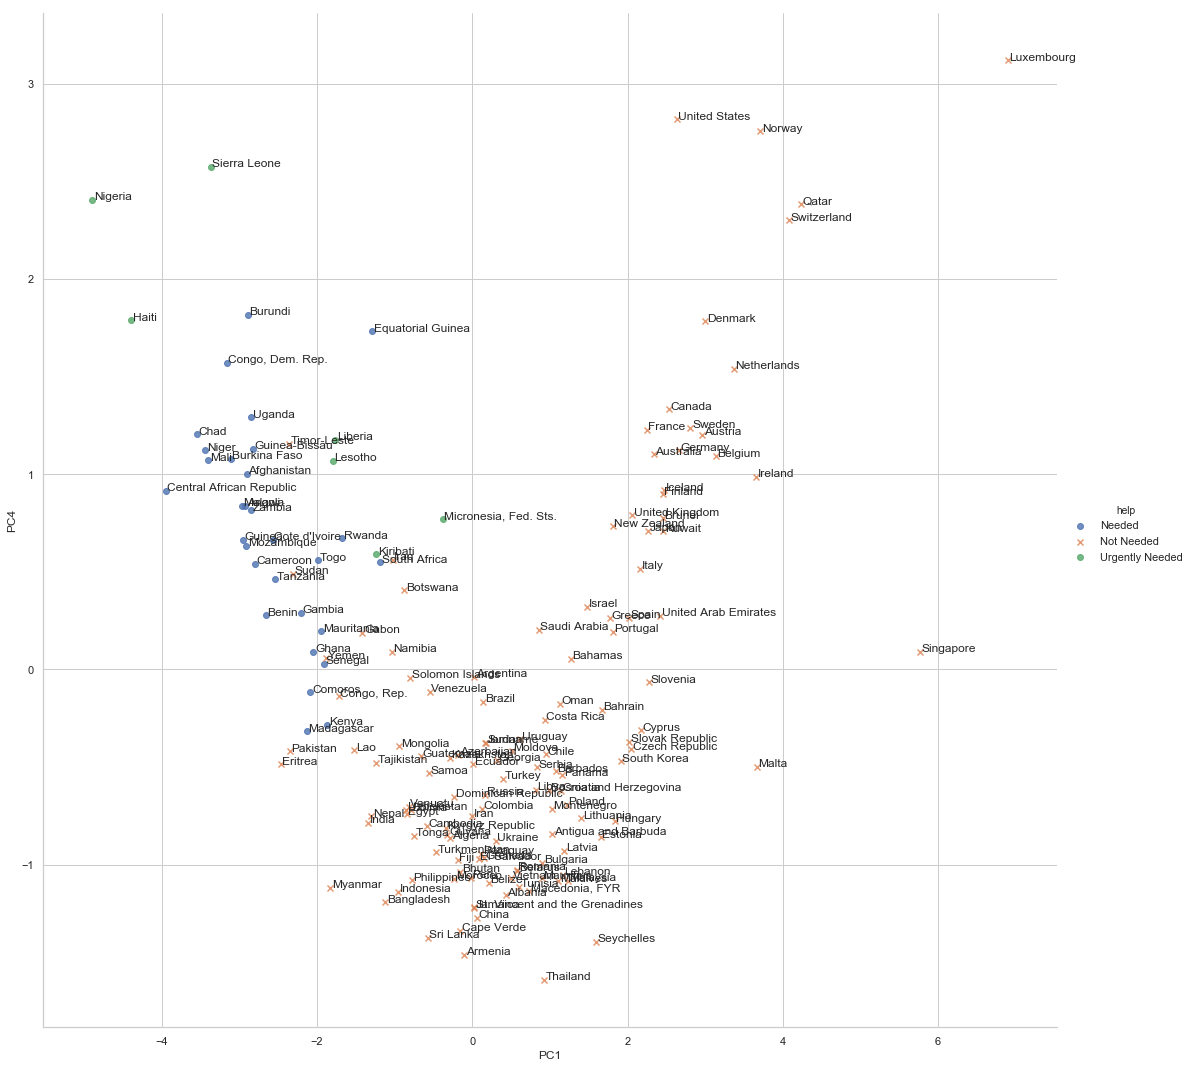

In [135]:
# Plotting PC1 vs PC4 hue by country (need help or not)
sns.set(style="whitegrid",font_scale=1)
ax = sns.lmplot(x="PC1", y="PC4",data=df_plot, height=15, hue="help", fit_reg=False, markers=["o", "x", "o"])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_plot.PC1, df_plot.PC4, df_plot.country, plt.gca())  

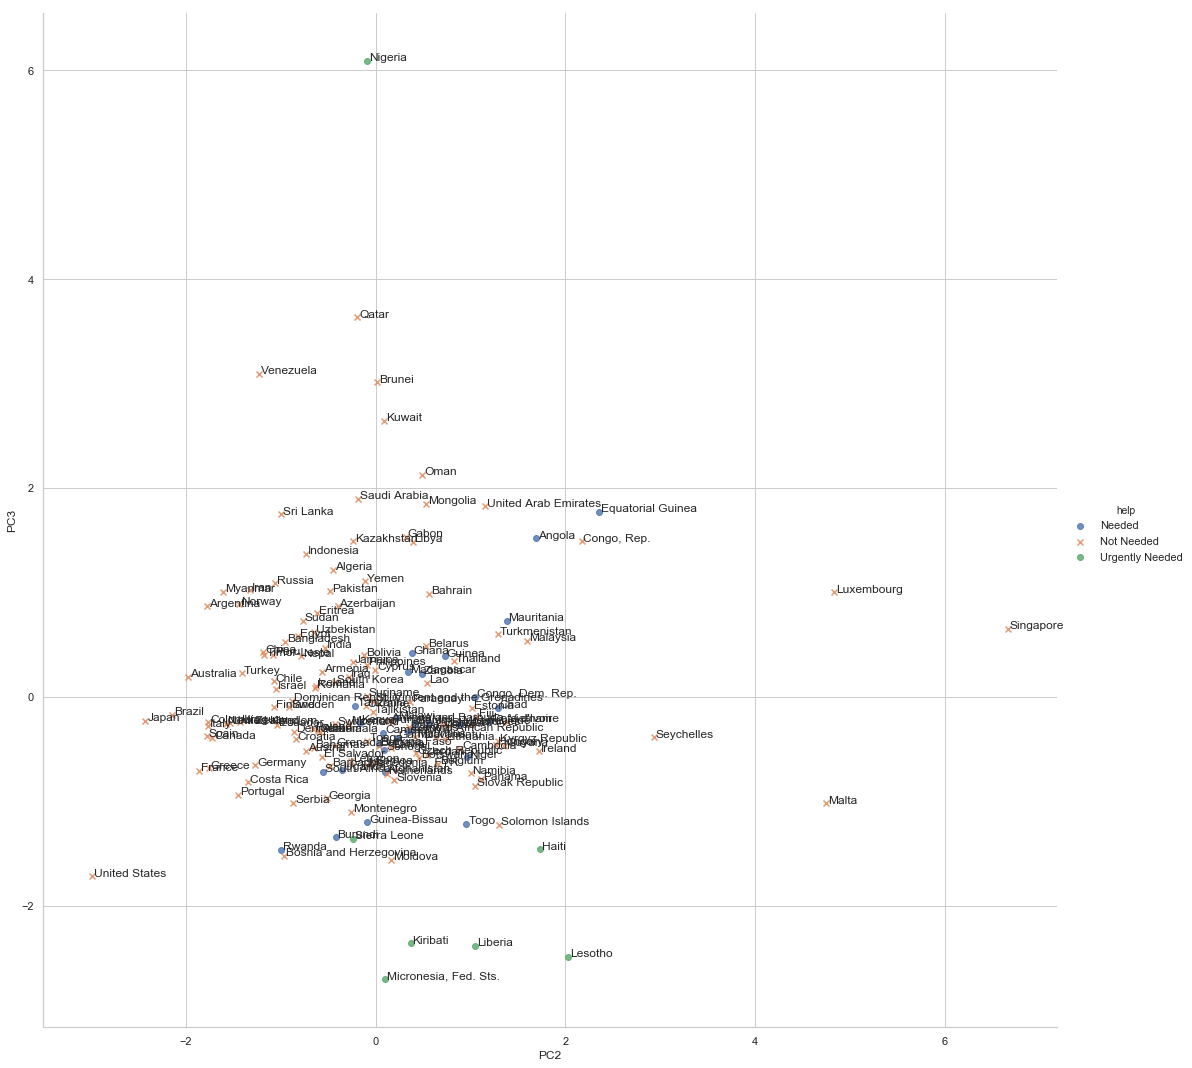

In [136]:
# Plotting PC2 vs PC3 hue by country (need help or not)
sns.set(style="whitegrid",font_scale=1)
ax = sns.lmplot(x="PC2", y="PC3",data=df_plot, height=15, hue="help", fit_reg=False, markers=["o", "x", "o"])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_plot.PC2, df_plot.PC3, df_plot.country, plt.gca())  

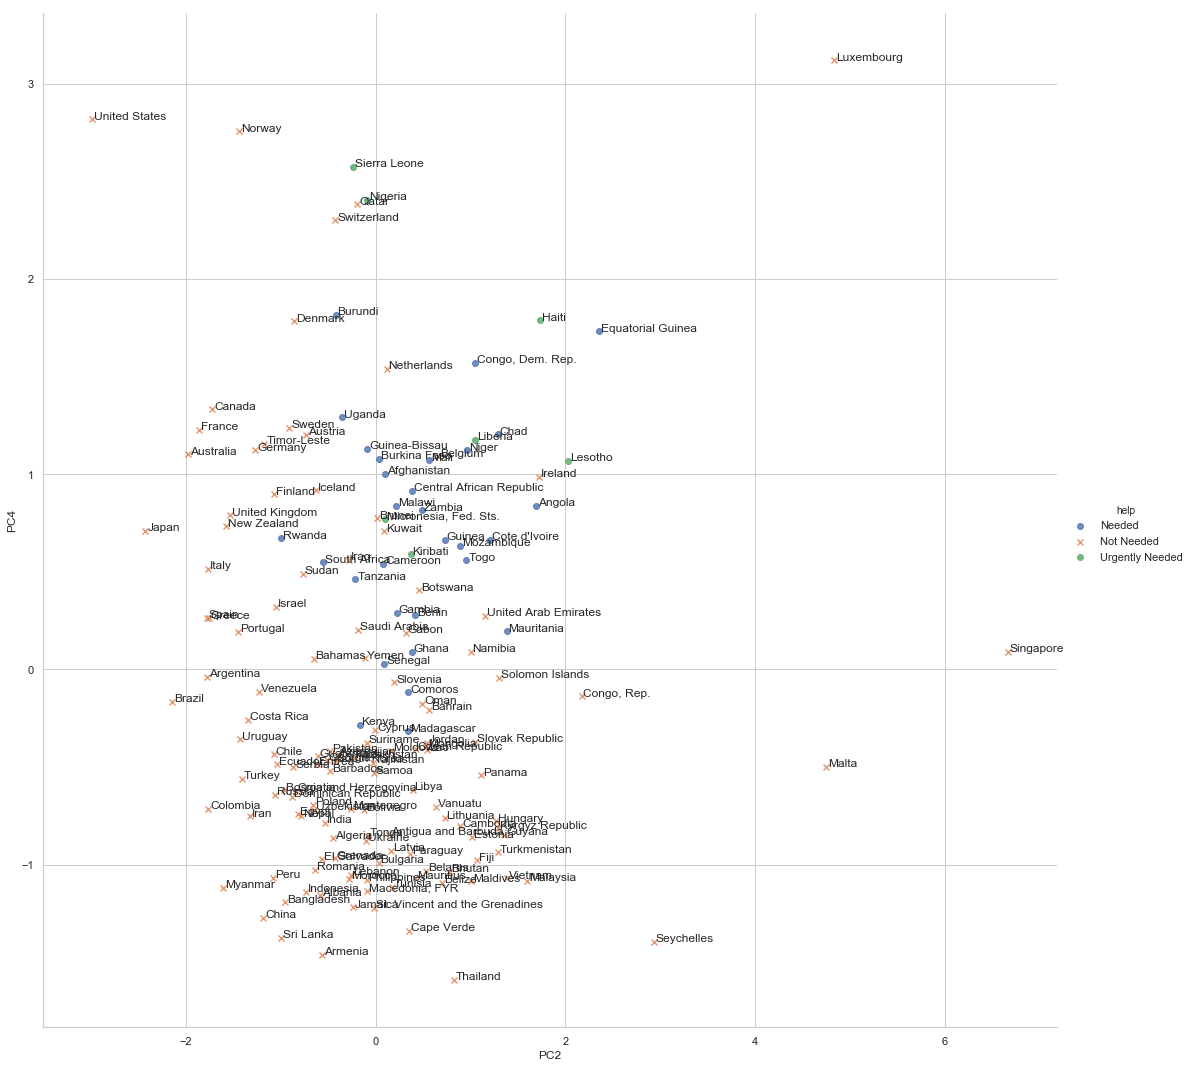

In [137]:
# Plotting PC2 vs PC4 hue by country (need help or not)
sns.set(style="whitegrid",font_scale=1)
ax = sns.lmplot(x="PC2", y="PC4",data=df_plot, height=15, hue="help", fit_reg=False, markers=["o", "x", "o"])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_plot.PC2, df_plot.PC4, df_plot.country, plt.gca())  

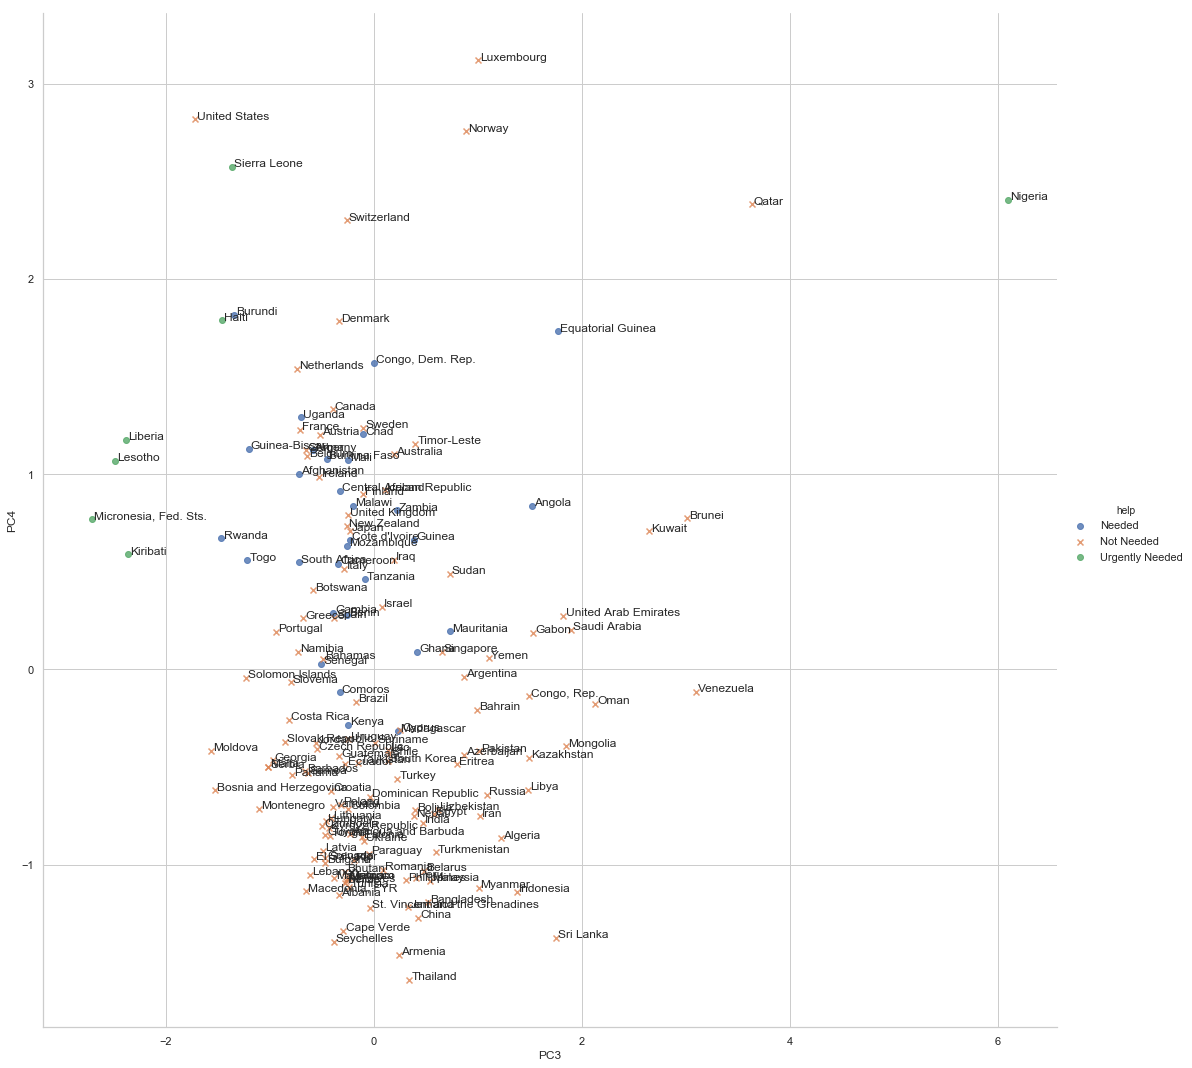

In [138]:
# Plotting PC3 vs PC4 hue by country (need help or not)
sns.set(style="whitegrid",font_scale=1)
ax = sns.lmplot(x="PC3", y="PC4",data=df_plot, height=15, hue="help", fit_reg=False, markers=["o", "x", "o"])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_plot.PC3, df_plot.PC4, df_plot.country, plt.gca())  

In [141]:
# Verified with plot, listing final list of countries that need funding on high priority by HELP International
print('FUNDING NEEDED AT HIGHER PRIORITY')
for k,v in enumerate(o_hc_c_set):
    print(f'{k+1}. {v}')

FUNDING NEEDED AT HIGHER PRIORITY
1. Micronesia, Fed. Sts.
2. Liberia
3. Nigeria
4. Haiti
5. Sierra Leone
6. Kiribati
7. Lesotho


In [140]:
# Verified with plot, listing final list of countries that need urgent funding on moderate priority by HELP International
print('FUNDING NEEDED AT MODERATE PRIORITY')
for k,v in enumerate((hc_c_set)&(k5_set | k6_set | k7_set)):
    print(f'{k+1}. {v}')

FUNDING NEEDED AT MODERATE PRIORITY
1. Comoros
2. Angola
3. Kenya
4. Benin
5. Congo, Dem. Rep.
6. Afghanistan
7. Niger
8. Uganda
9. Togo
10. Mali
11. Cote d'Ivoire
12. Ghana
13. Guinea-Bissau
14. Malawi
15. Chad
16. Rwanda
17. Madagascar
18. Equatorial Guinea
19. Mauritania
20. Central African Republic
21. Guinea
22. Mozambique
23. Cameroon
24. Tanzania
25. Burkina Faso
26. South Africa
27. Gambia
28. Senegal
29. Zambia
30. Burundi
